# 데이터 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 로드

rfm = pd.read_csv('../data/final_RFM_1028.csv', index_col=0)
rfm.head(3)

,R지표,F지표,M지표,총구매액,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,...,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,Class,RFM
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
PC방,0.558159,9.308622,7.756749,1.919232e+12,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,...,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473,1,7.541706
가구,0.522473,4.666472,11.545900,3.341568e+12,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,...,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462,4,5.200289
가방,0.483539,5.267057,9.787922,1.643071e+12,35.257183,64.714365,1.247420,16.320502,16.985495,20.355649,...,21.221757,13.069177,14.248257,14.386053,14.789679,15.399442,17.570990,10.819247,4,5.267615


In [3]:
rfm.Class.value_counts().index

Int64Index([4, 3, 5, 2, 1], dtype='int64')

In [4]:
# RFM 점수가 평균 이하인 클래스는 4, 5번

rfm[rfm['RFM'] < rfm['RFM'].mean()].Class.unique()

array([4, 5], dtype=int64)

# 시간의 흐름에 따른 MZ세대 매출 비율의 변화

In [145]:
rfm.columns

Index(['R지표', 'F지표', 'M지표', '총구매액', '남성_매출_비율', '여성_매출_비율', '연령대_10_매출_비율',
       '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율', '연령대_50_매출_비율',
       '연령대_60_이상_매출_비율', '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율',
       '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', 'Class', 'RFM'],
      dtype='object')

In [146]:
rfm.head()

,R지표,F지표,M지표,총구매액,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,...,연령대_60_이상_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,Class,RFM
서비스_업종_코드_명,,,,,,,,,,,,,,,,,,,,,
PC방,3.672594,9.308622,7.756749,1.919232e+12,81.959539,18.137291,11.954697,63.076657,14.309280,5.799308,...,0.879539,12.956657,12.745937,12.898098,12.891643,14.538559,17.420749,16.908473,1,6.862272
가구,3.464427,4.666472,11.545900,3.341568e+12,42.918840,57.003964,0.153557,6.385980,15.731275,22.633424,...,24.933653,14.719382,13.955560,14.285416,13.980805,13.623201,17.578552,12.088462,4,5.298383
가방,3.237308,5.267057,9.787922,1.643071e+12,35.257183,64.714365,1.247420,16.320502,16.985495,20.355649,...,21.221757,13.069177,14.248257,14.386053,14.789679,15.399442,17.570990,10.819247,4,5.198793
가전제품,3.327763,5.429604,11.116808,5.041353e+12,55.398090,44.345430,0.515416,9.227285,16.471214,21.784175,...,25.117872,16.902046,15.499591,15.695498,15.957162,15.704229,12.819918,7.666303,3,5.519839
가전제품수리,3.506561,4.725538,10.492362,2.262060e+11,55.775908,43.875505,0.437079,9.503365,17.770861,23.136608,...,23.306191,17.697510,17.702557,16.656460,16.236205,16.100942,12.011440,3.779273,4,5.172829


# Class 비율분포 및 총 구매액 비교

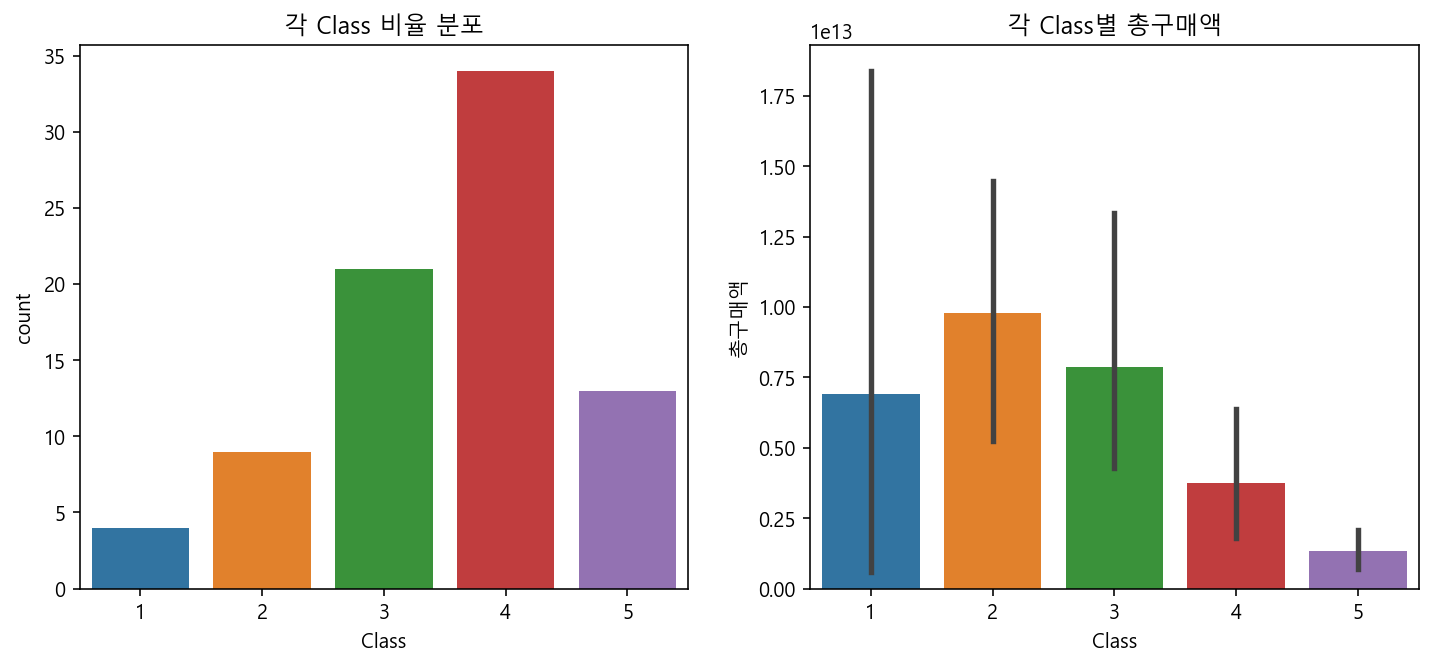

In [5]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.countplot(rfm.Class)
plt.title('각 Class 비율 분포')
plt.subplot(122)
sns.barplot(data=rfm, y='총구매액', x='Class')
plt.title('각 Class별 총구매액')
plt.show()

1번 클래스는 명확한 성장산업으로 파악됨.

5번 클래스는 명확한 하향산업으로 판단되어 추후 5번 클래스 서비스 업종에 대해 추가 분석이 요구

In [6]:
# Class에 따라 df 분리

class1_df = rfm[rfm['Class']==1]
class2_df = rfm[rfm['Class']==2]
class3_df = rfm[rfm['Class']==3]
class4_df = rfm[rfm['Class']==4]
class5_df = rfm[rfm['Class']==5]

# Class 1

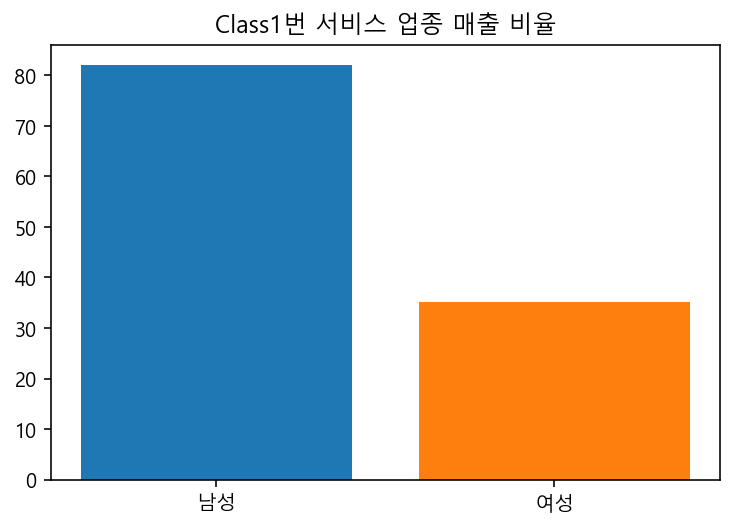

In [7]:
plt.title('Class1번 서비스 업종 매출 비율')
plt.bar(x='남성', height=class1_df['남성_매출_비율'])
plt.bar(x='여성', height=class1_df['여성_매출_비율'])
plt.show()

Class1 서비스 산업의 경우 남성의 매출비중이 높음

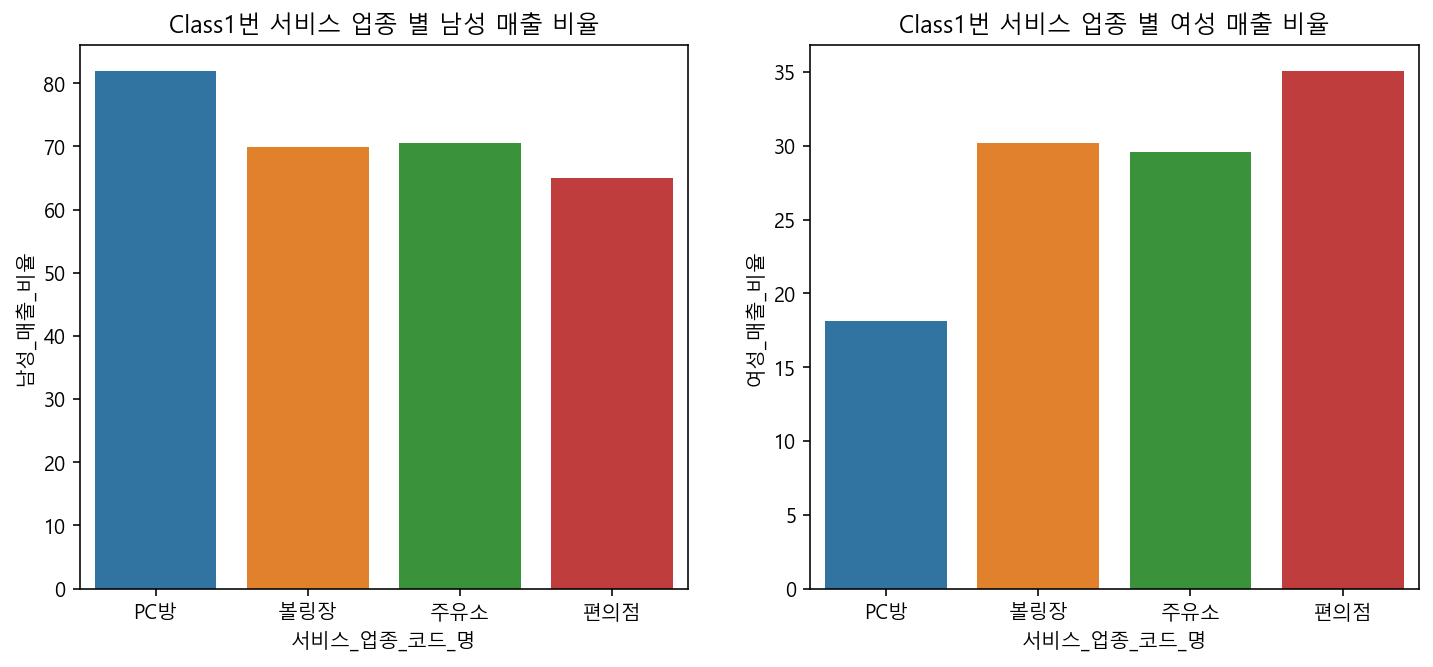

In [8]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title('Class1번 서비스 업종 별 남성 매출 비율')
sns.barplot(data=class1_df, x=class1_df.index, y='남성_매출_비율')

plt.subplot(122)
plt.title('Class1번 서비스 업종 별 여성 매출 비율')
sns.barplot(data=class1_df, x=class1_df.index, y='여성_매출_비율')
plt.show()

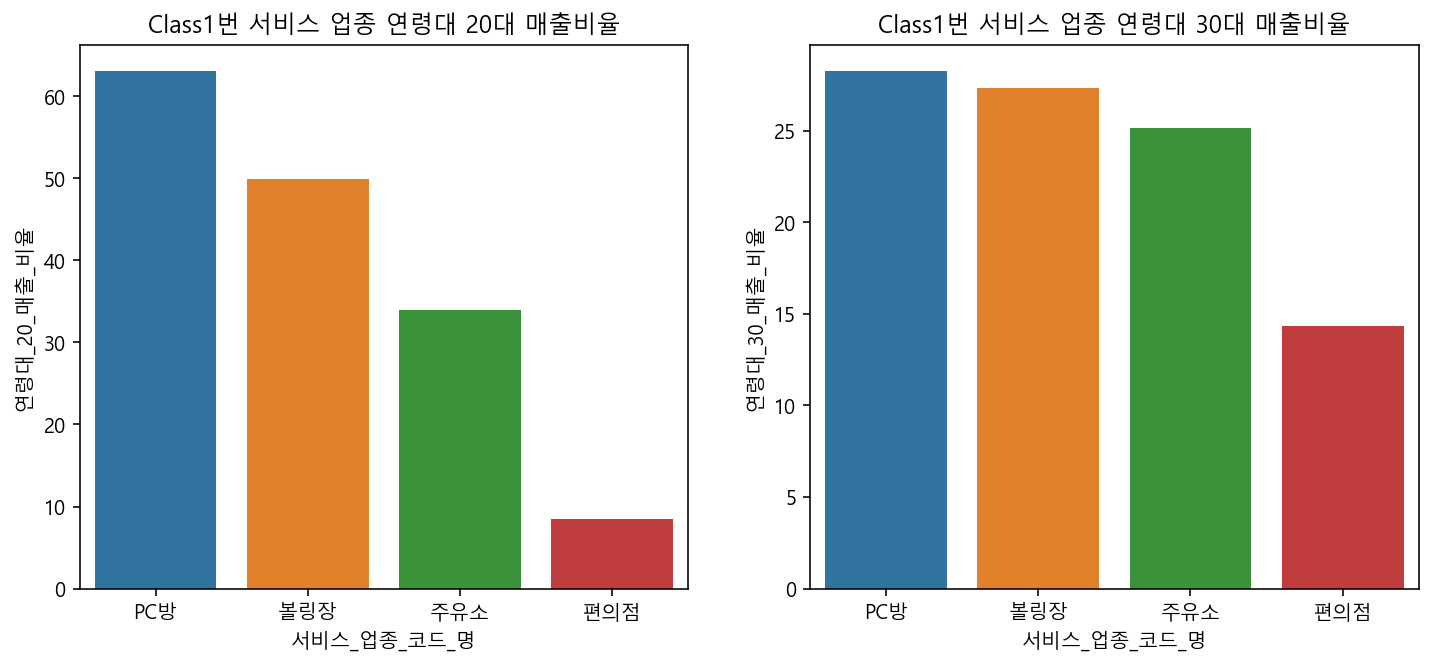

In [9]:
plt.figure(figsize=(12, 5))
for_plot = class1_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)
plt.subplot(121)
plt.title('Class1번 서비스 업종 연령대 20대 매출비율')
sns.barplot(data=for_plot, x=class1_df.index, y='연령대_20_매출_비율')

plt.subplot(122)
for_plot = class1_df[['연령대_30_매출_비율']].sort_values(by='연령대_30_매출_비율', ascending=False)
plt.title('Class1번 서비스 업종 연령대 30대 매출비율')
sns.barplot(data=for_plot, x=class1_df.index, y='연령대_30_매출_비율')
plt.show()

MZ 세대라 할 수 있는 2030 세대의 1번 Class 서비스 업종 중 다음의 특징을 가짐

1. 20대의 경우 압도적인 PC방, 편의점 매출비중을 기여
2. 30대의 경우 주유소와 편의점에 많은 매출비중을 기여

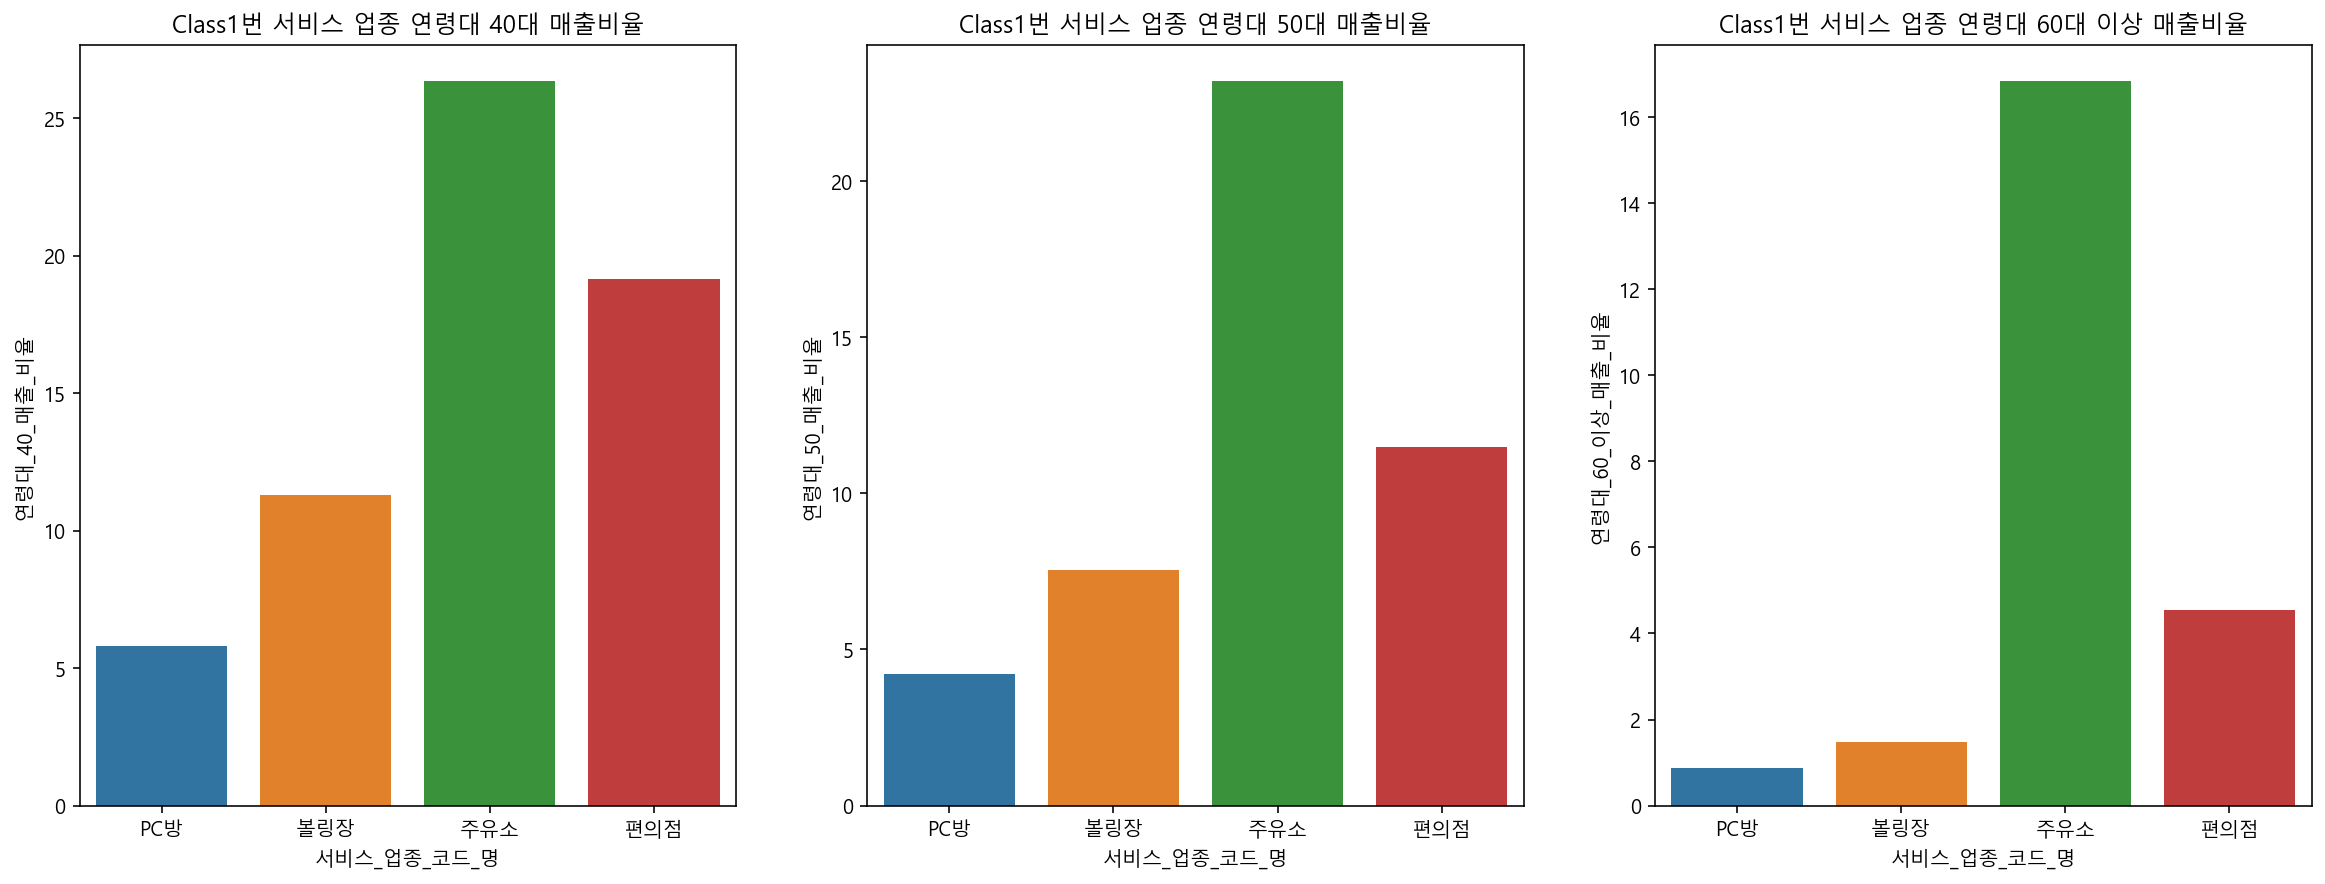

In [10]:
plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.title('Class1번 서비스 업종 연령대 40대 매출비율')
sns.barplot(data=class1_df, x=class1_df.index, y='연령대_40_매출_비율')

plt.subplot(132)
plt.title('Class1번 서비스 업종 연령대 50대 매출비율')
sns.barplot(data=class1_df, x=class1_df.index, y='연령대_50_매출_비율')

plt.subplot(133)
plt.title('Class1번 서비스 업종 연령대 60대 이상 매출비율')
sns.barplot(data=class1_df, x=class1_df.index, y='연령대_60_이상_매출_비율')
plt.show()

# Class 2

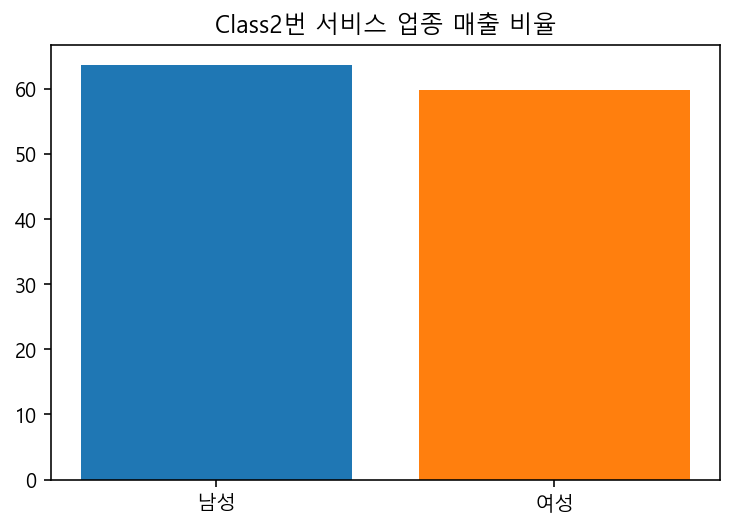

In [11]:
plt.title('Class2번 서비스 업종 매출 비율')
plt.bar(x='남성', height=class2_df['남성_매출_비율'])
plt.bar(x='여성', height=class2_df['여성_매출_비율'])
plt.show()

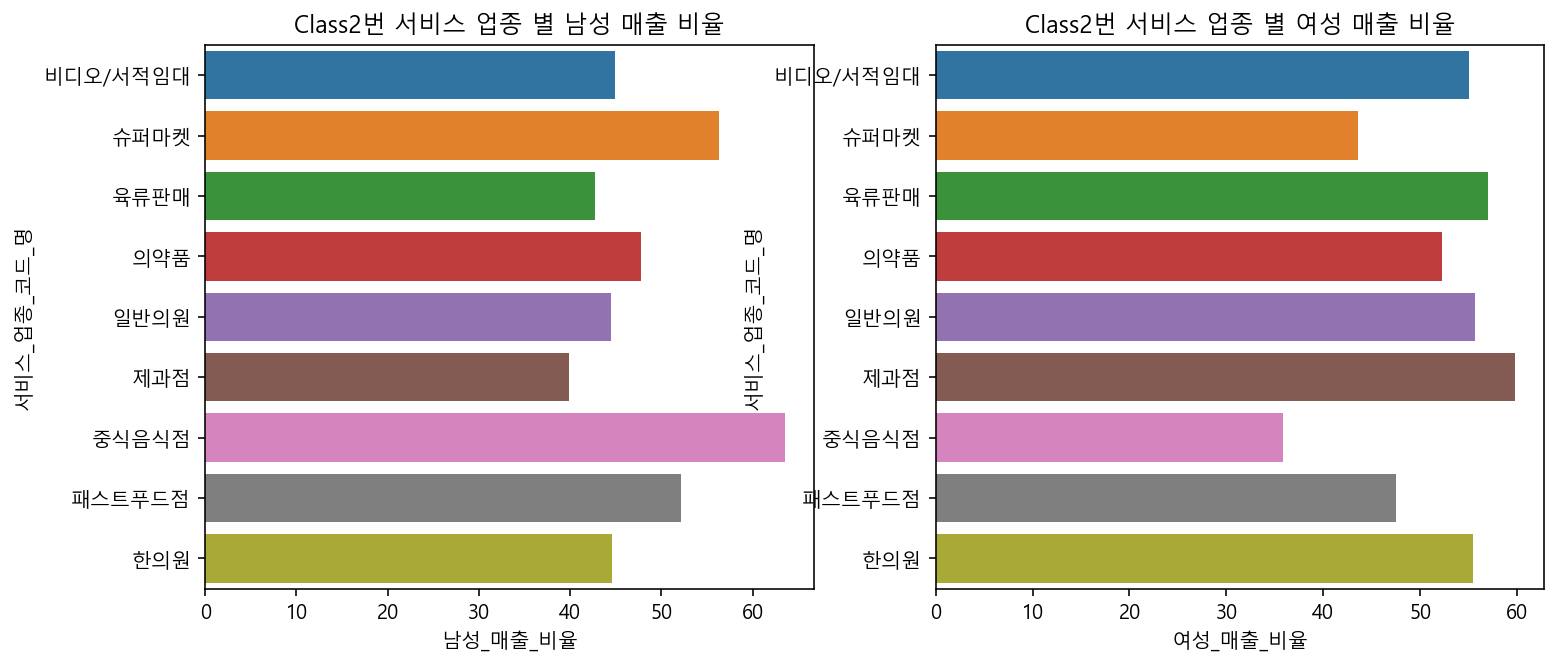

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.title('Class2번 서비스 업종 별 남성 매출 비율')
sns.barplot(data=class2_df, y=class2_df.index, x='남성_매출_비율')

plt.subplot(122)
plt.title('Class2번 서비스 업종 별 여성 매출 비율')
sns.barplot(data=class2_df, y=class2_df.index, x='여성_매출_비율')
plt.show()

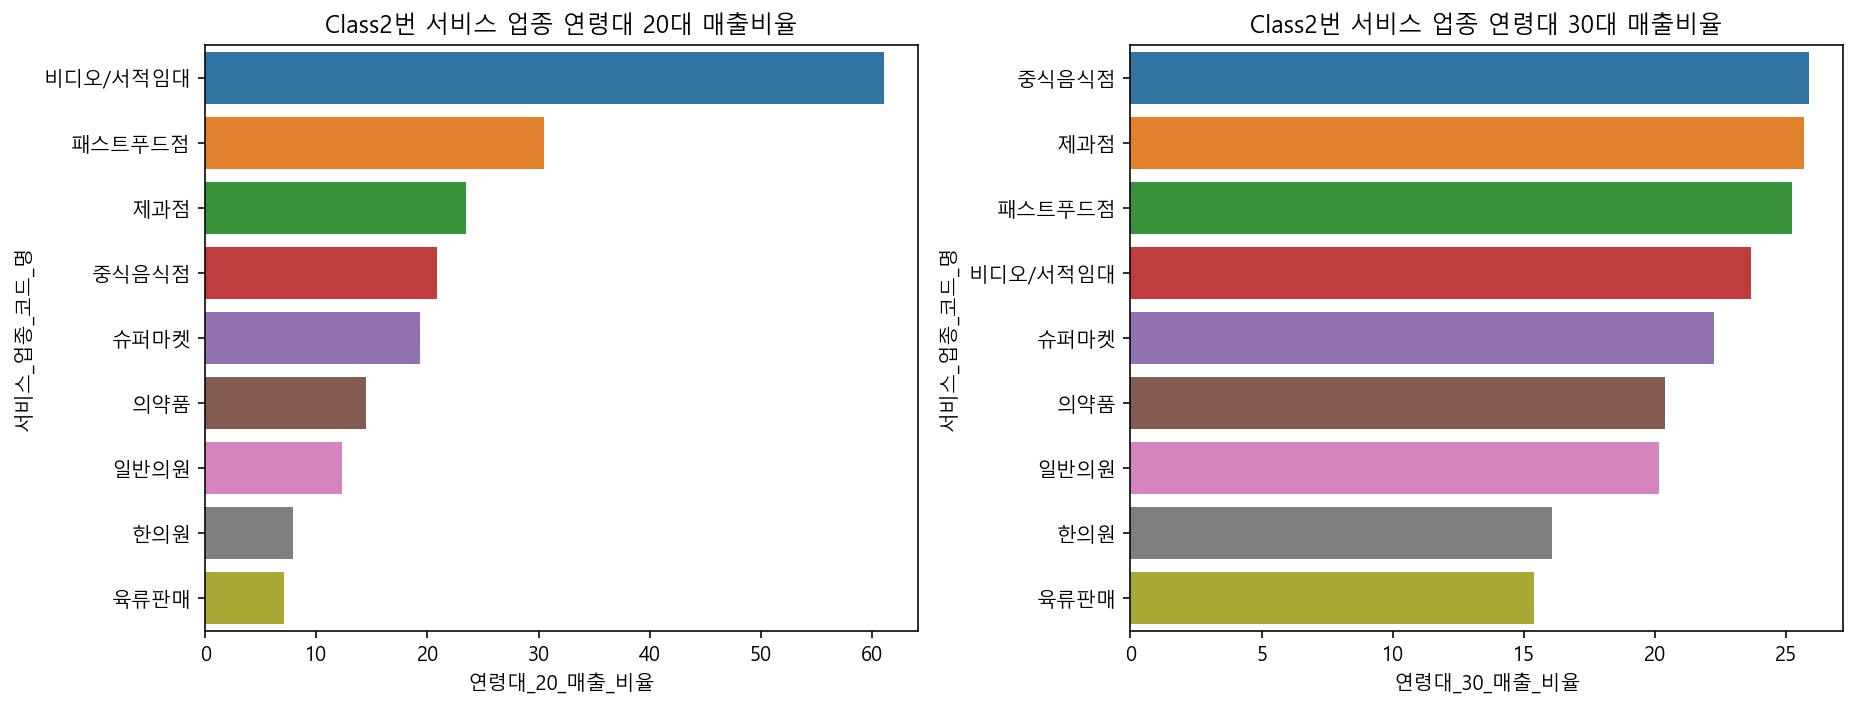

In [36]:
plt.figure(figsize=(13, 5))
plt.subplot(121)
plt.title('Class2번 서비스 업종 연령대 20대 매출비율')
for_plot = class2_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_20_매출_비율')

plt.subplot(122)
plt.title('Class2번 서비스 업종 연령대 30대 매출비율')
for_plot = class2_df[['연령대_30_매출_비율']].sort_values(by='연령대_30_매출_비율', ascending=False)
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_30_매출_비율')
plt.tight_layout()
plt.show()

Class 2번의 경우 20대는 볼링장, **비디오/서적임대**에 많은 매출비중을 기여

30대의 경우 다양한 서비스 산업에 많은 매출비중을 기여, 눈에 띄는 특징은 주로 식음료와 관련된 매출비중이 높다는 것.(음식점, 커피) 또한 20대에서 많은 매출비중을 보인 **비디오/서적임대** 매출비중이 약 25%로 확인됨.

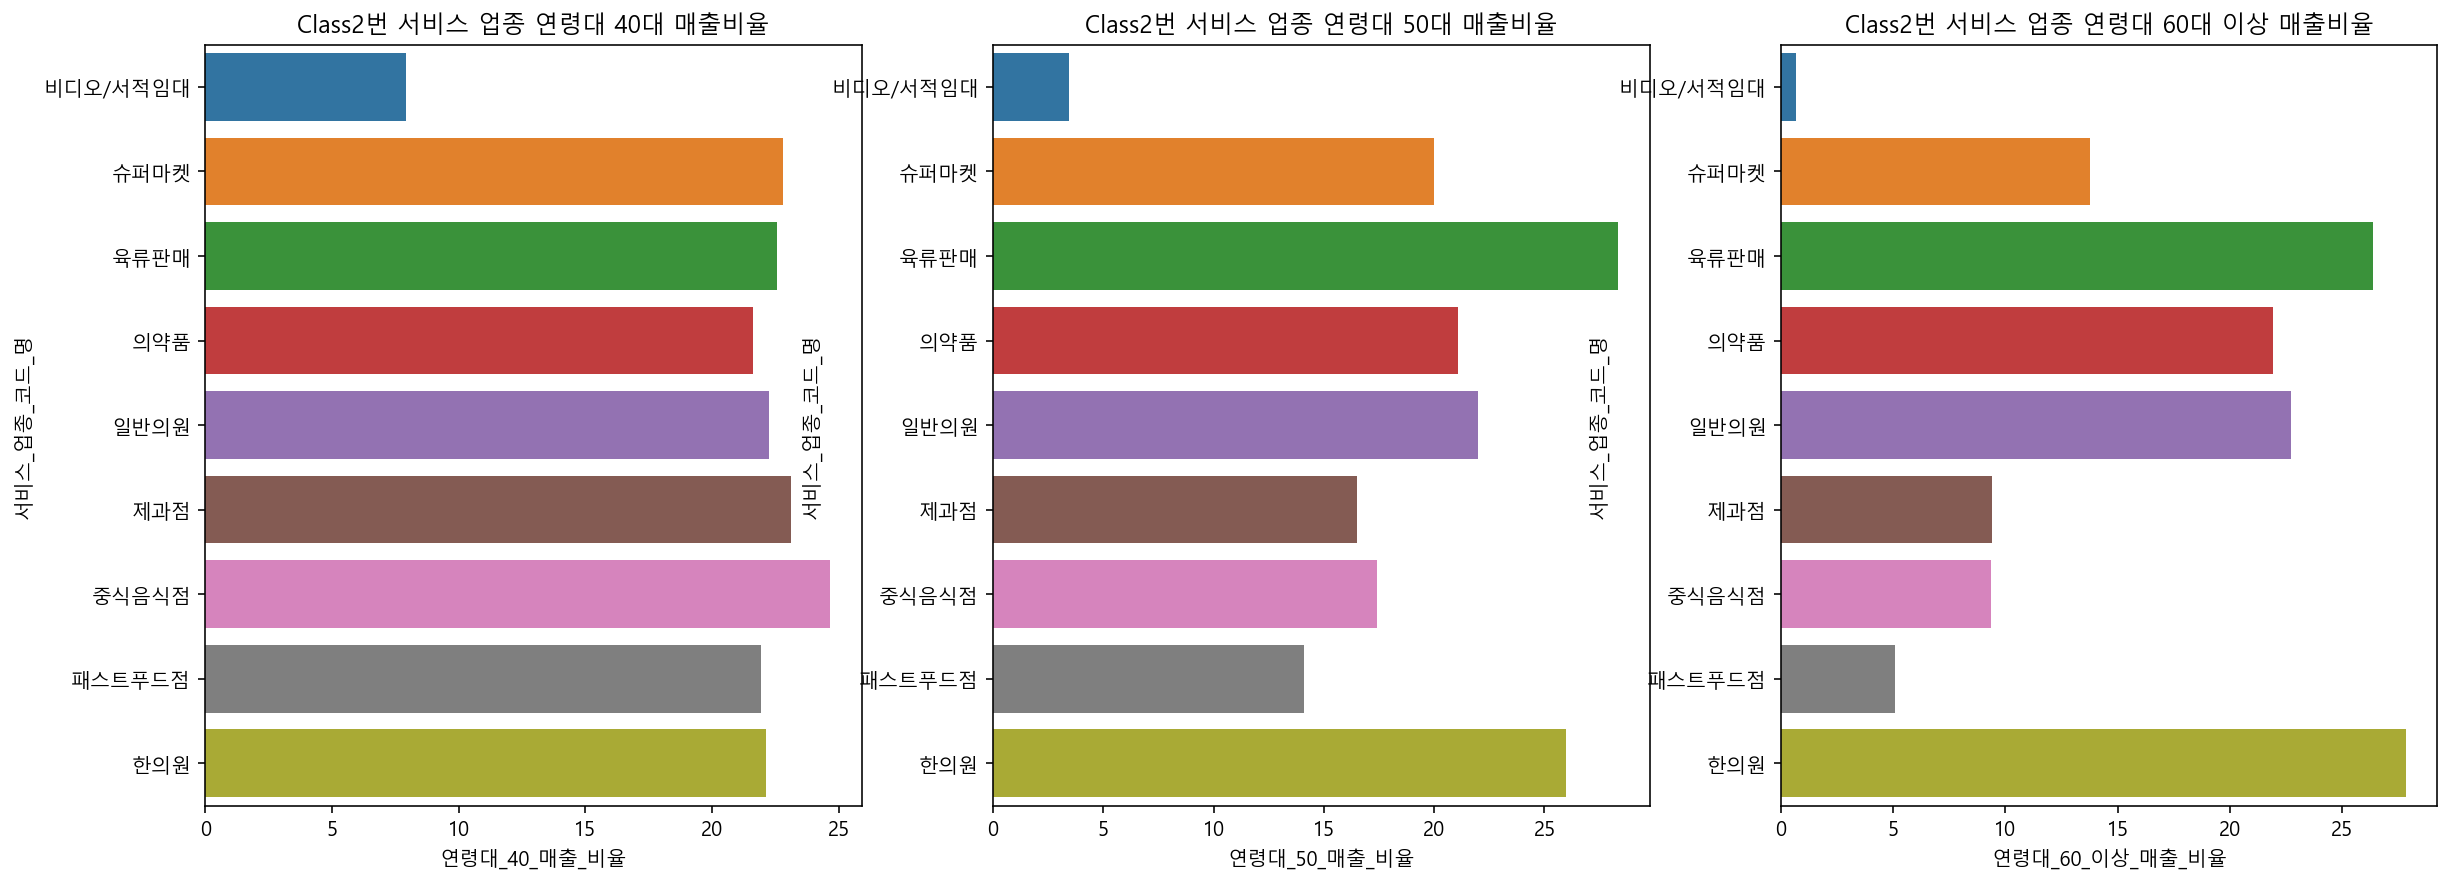

In [14]:
plt.figure(figsize=(20, 7))
plt.subplot(131)
plt.title('Class2번 서비스 업종 연령대 40대 매출비율')
sns.barplot(data=class2_df, y=class2_df.index, x='연령대_40_매출_비율')

plt.subplot(132)
plt.title('Class2번 서비스 업종 연령대 50대 매출비율')
sns.barplot(data=class2_df, y=class2_df.index, x='연령대_50_매출_비율')

plt.subplot(133)
plt.title('Class2번 서비스 업종 연령대 60대 이상 매출비율')
sns.barplot(data=class2_df, y=class2_df.index, x='연령대_60_이상_매출_비율')
plt.show()

# Class 3

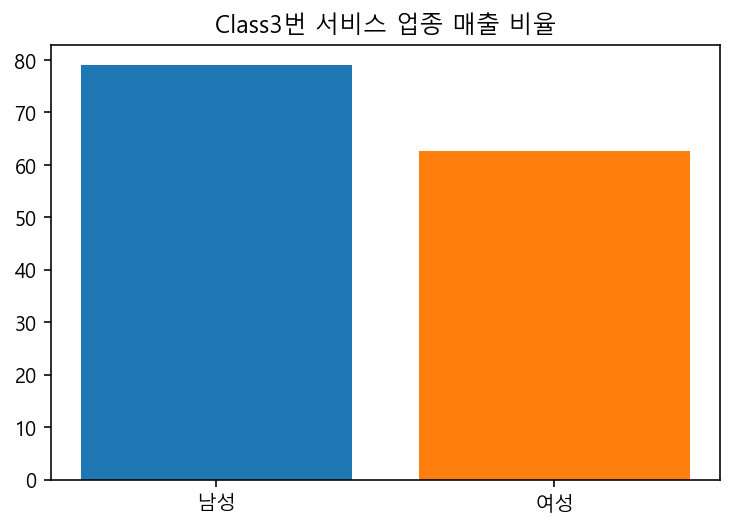

In [15]:
plt.title('Class3번 서비스 업종 매출 비율')
plt.bar(x='남성', height=class3_df['남성_매출_비율'])
plt.bar(x='여성', height=class3_df['여성_매출_비율'])
plt.show()

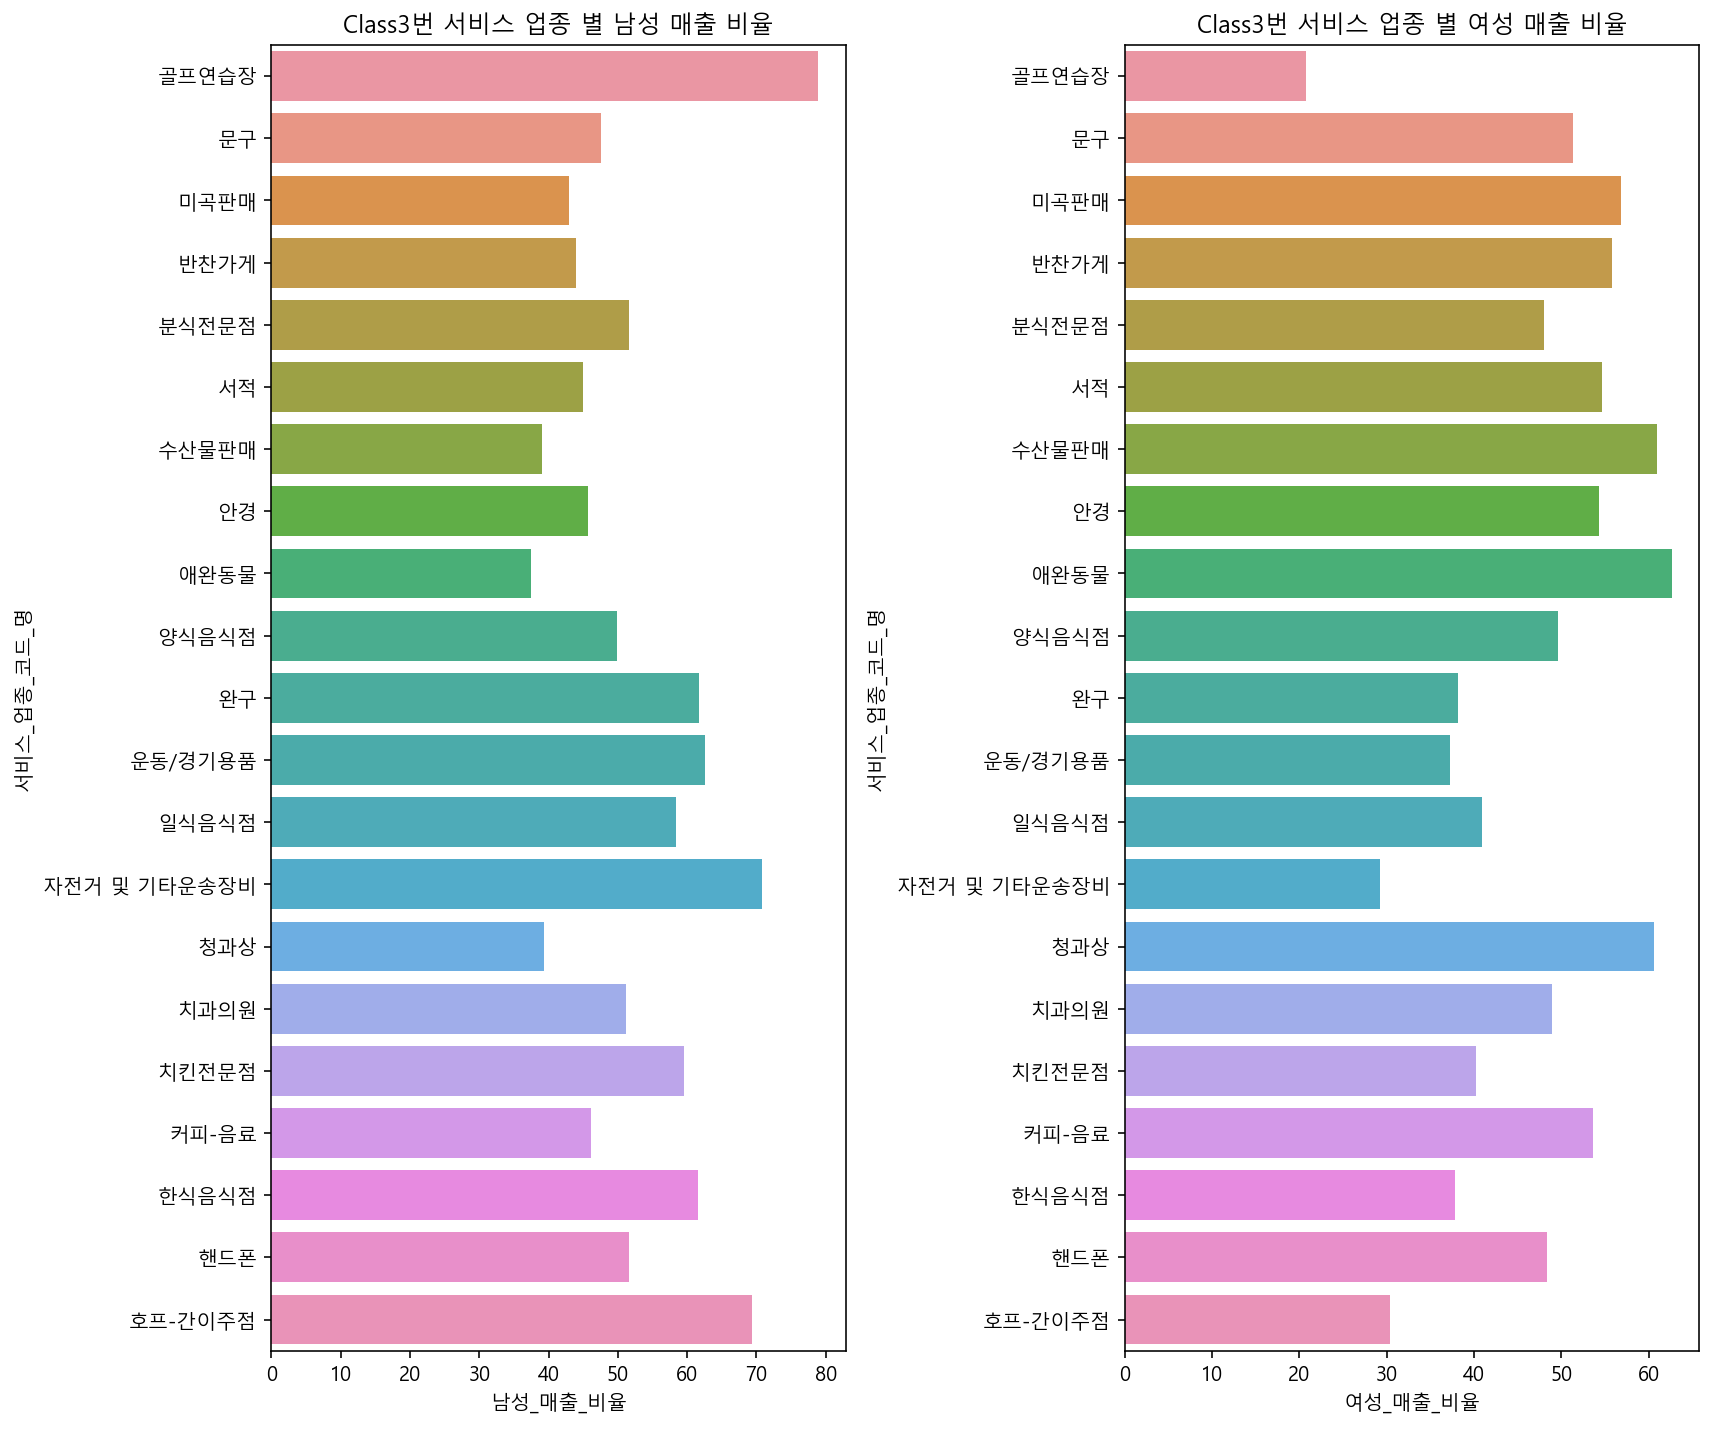

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
plt.title('Class3번 서비스 업종 별 남성 매출 비율')
sns.barplot(data=class3_df, y=class3_df.index, x='남성_매출_비율')

plt.subplot(122)
plt.title('Class3번 서비스 업종 별 여성 매출 비율')
sns.barplot(data=class3_df, y=class3_df.index, x='여성_매출_비율')
plt.tight_layout()
plt.show()

In [17]:
for_plot = class3_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)

In [18]:
for_plot.head(1)

,연령대_20_매출_비율
서비스_업종_코드_명,
양식음식점,31.568794


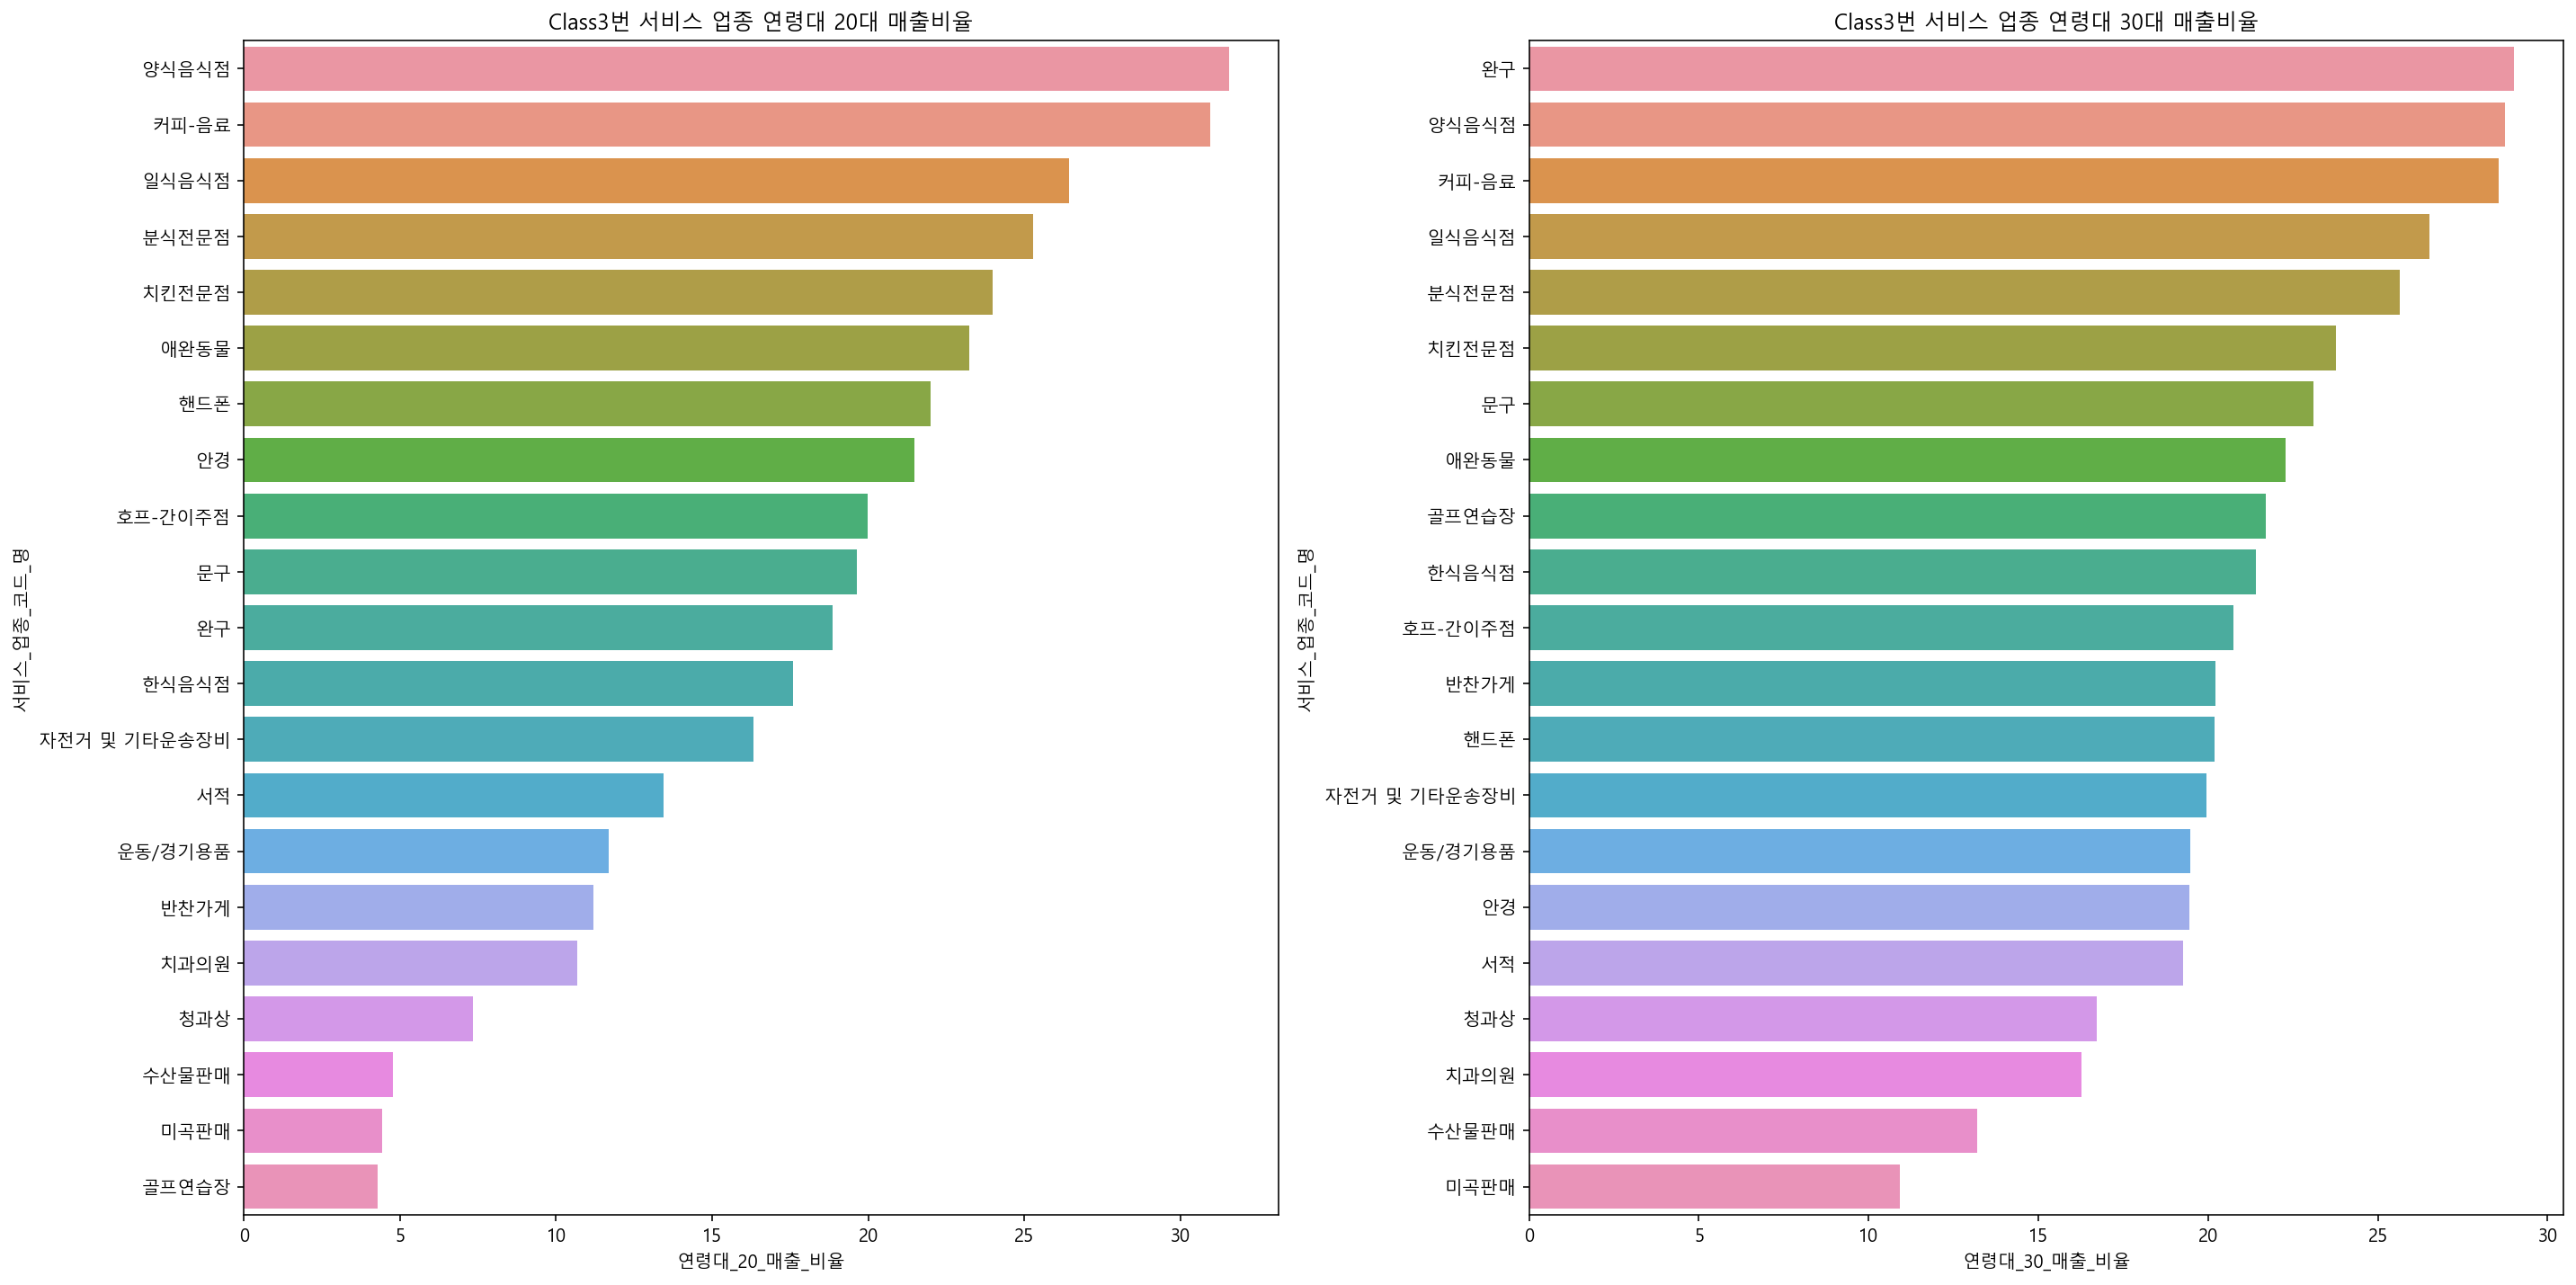

In [19]:
for_plot = class3_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title('Class3번 서비스 업종 연령대 20대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_20_매출_비율')

for_plot = class3_df[['연령대_30_매출_비율']].sort_values(by='연령대_30_매출_비율', ascending=False)

plt.subplot(122)
plt.title('Class3번 서비스 업종 연령대 30대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_30_매출_비율')

plt.tight_layout()
plt.show()

3번 클래스의 경우 20대가 많은 비중을 차지하는 서비스 업종은 여관, 스포츠클럽, **화초**, 분식, 애완, 핸드폰, 얀경 등등

30대는 `자동차, 세탁소, 완구, **화초**, 스포츠클럽, 분식, 골프연습장 등등`

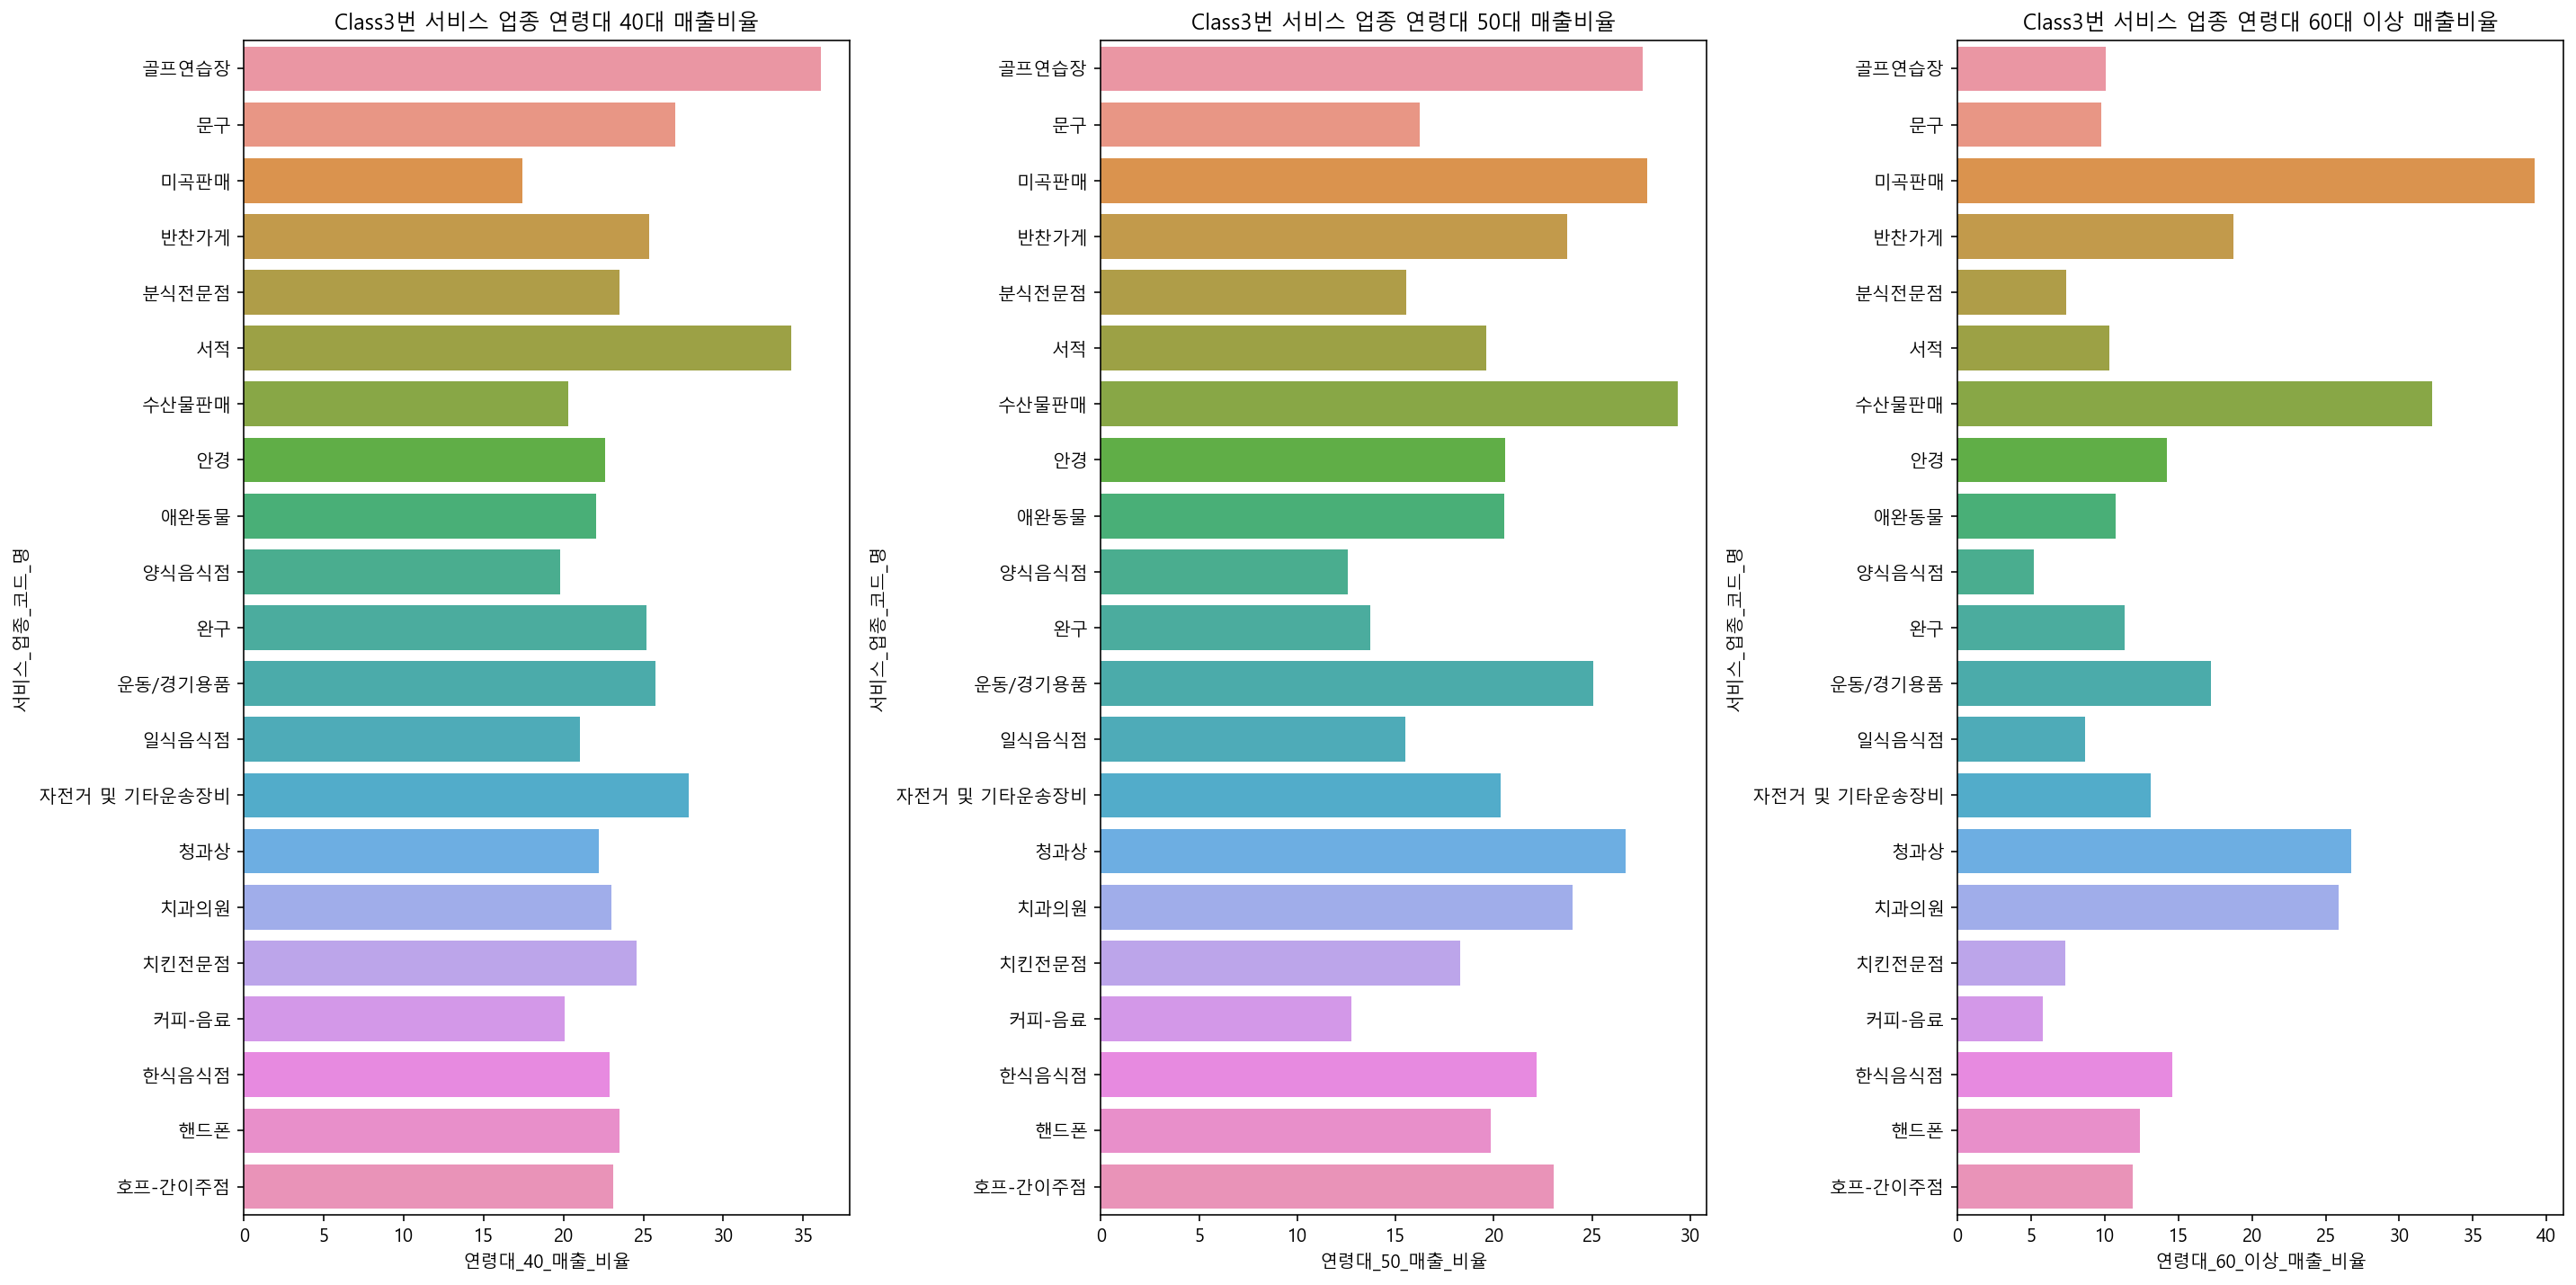

In [20]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Class3번 서비스 업종 연령대 40대 매출비율')
sns.barplot(data=class3_df, y=class3_df.index, x='연령대_40_매출_비율')

plt.subplot(132)
plt.title('Class3번 서비스 업종 연령대 50대 매출비율')
sns.barplot(data=class3_df, y=class3_df.index, x='연령대_50_매출_비율')

plt.subplot(133)
plt.title('Class3번 서비스 업종 연령대 60대 이상 매출비율')
sns.barplot(data=class3_df, y=class3_df.index, x='연령대_60_이상_매출_비율')

plt.tight_layout()
plt.show()

# Class 4

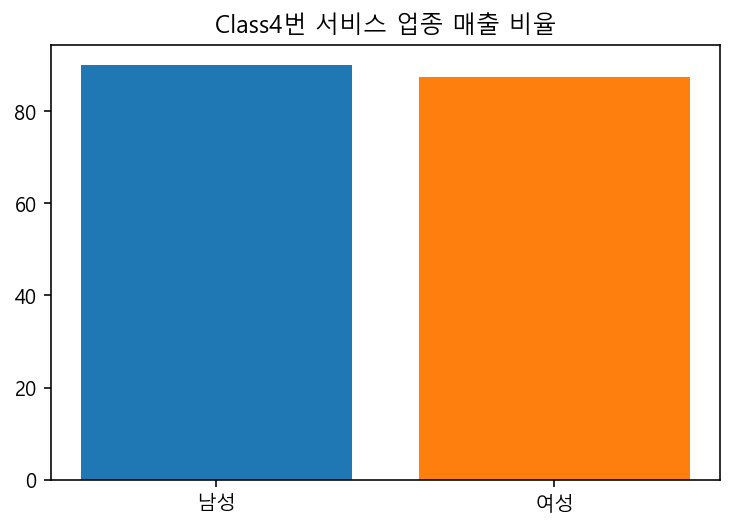

In [21]:
plt.title('Class4번 서비스 업종 매출 비율')
plt.bar(x='남성', height=class4_df['남성_매출_비율'])
plt.bar(x='여성', height=class4_df['여성_매출_비율'])
plt.show()

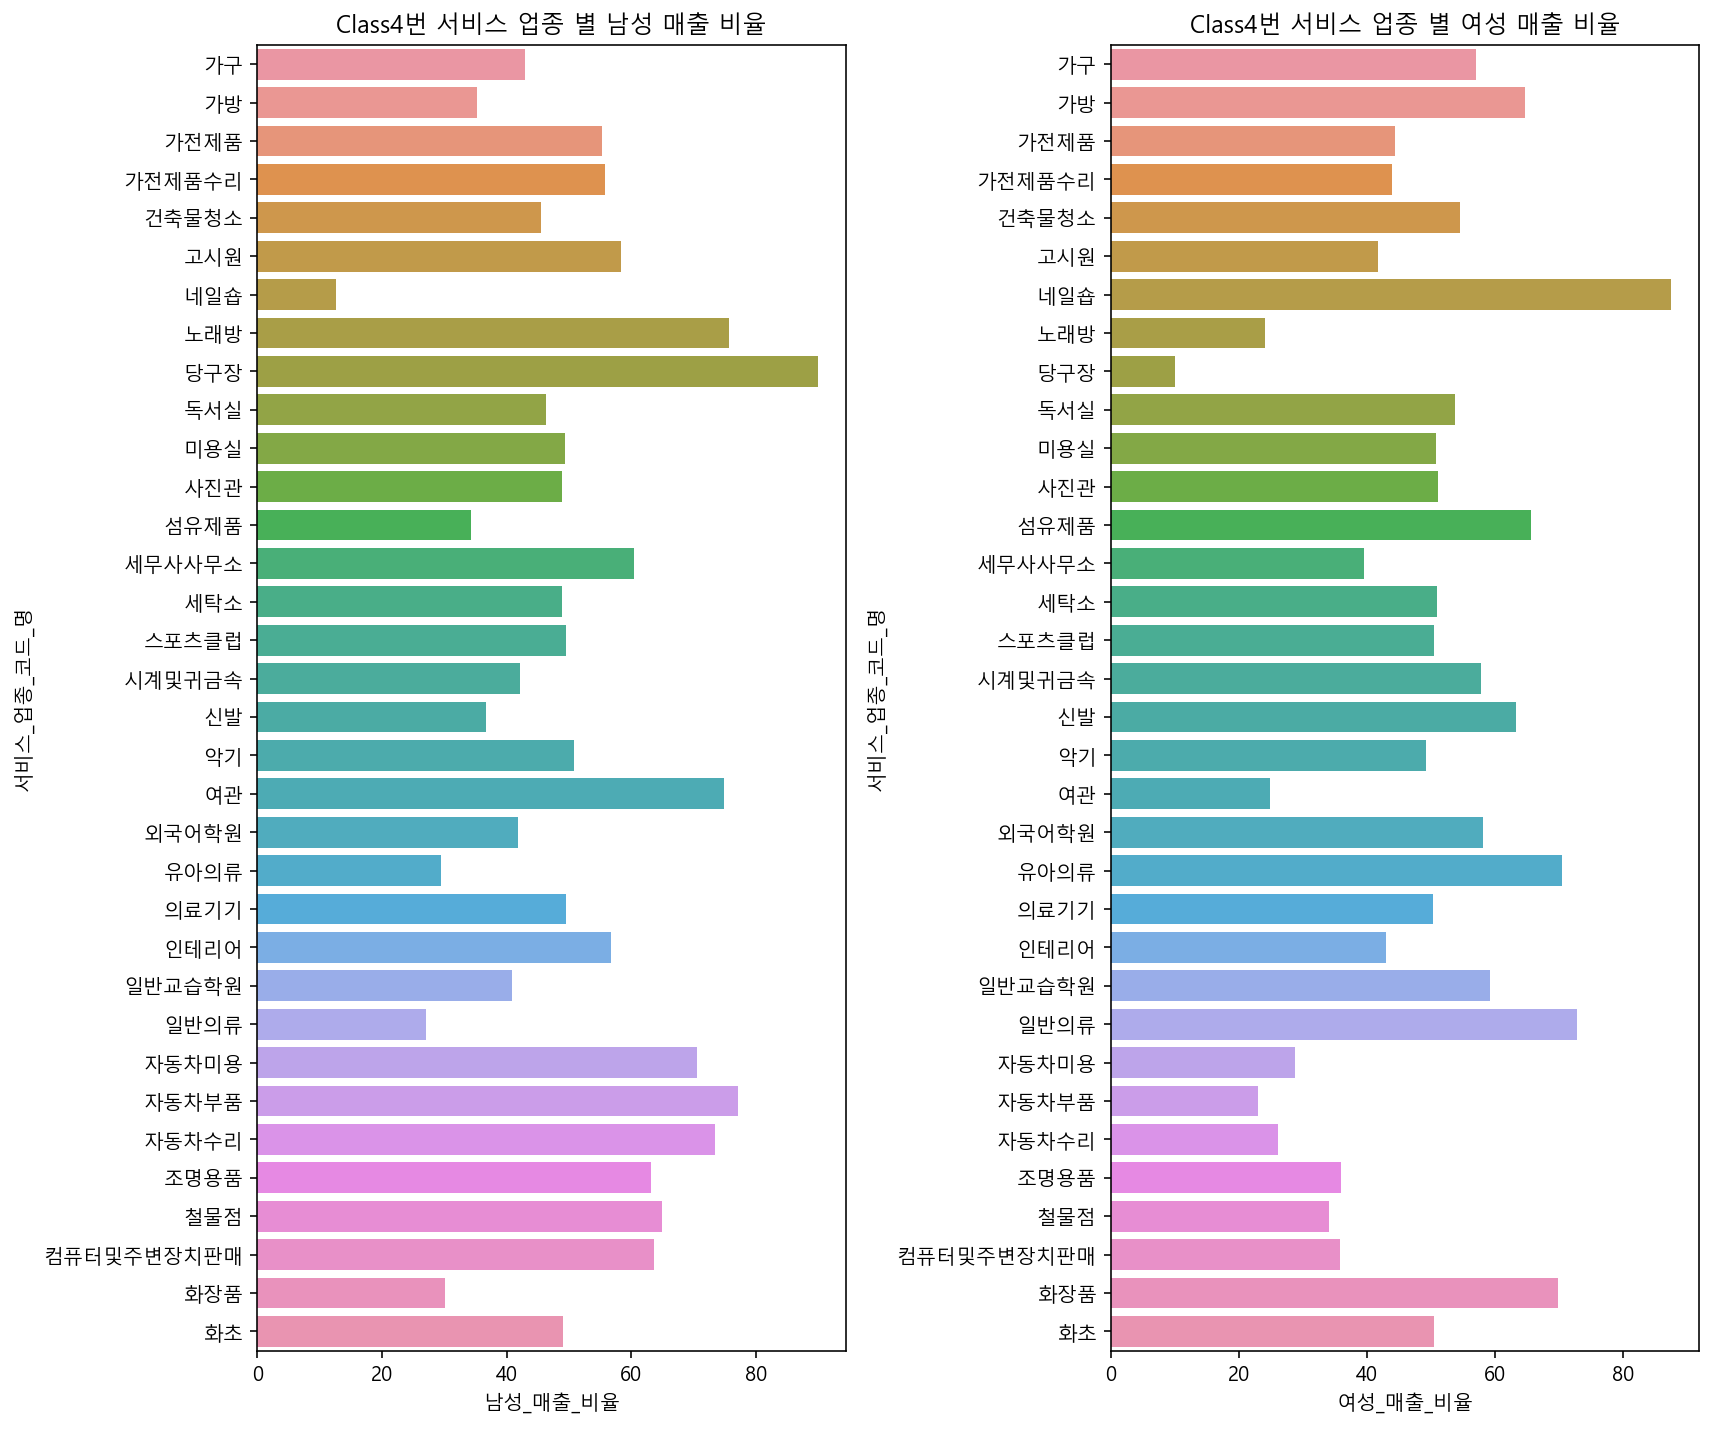

In [22]:
plt.figure(figsize=(12, 10))

plt.subplot(121)
plt.title('Class4번 서비스 업종 별 남성 매출 비율')
sns.barplot(data=class4_df, y=class4_df.index, x='남성_매출_비율')

plt.subplot(122)
plt.title('Class4번 서비스 업종 별 여성 매출 비율')
sns.barplot(data=class4_df, y=class4_df.index, x='여성_매출_비율')
plt.tight_layout()
plt.show()

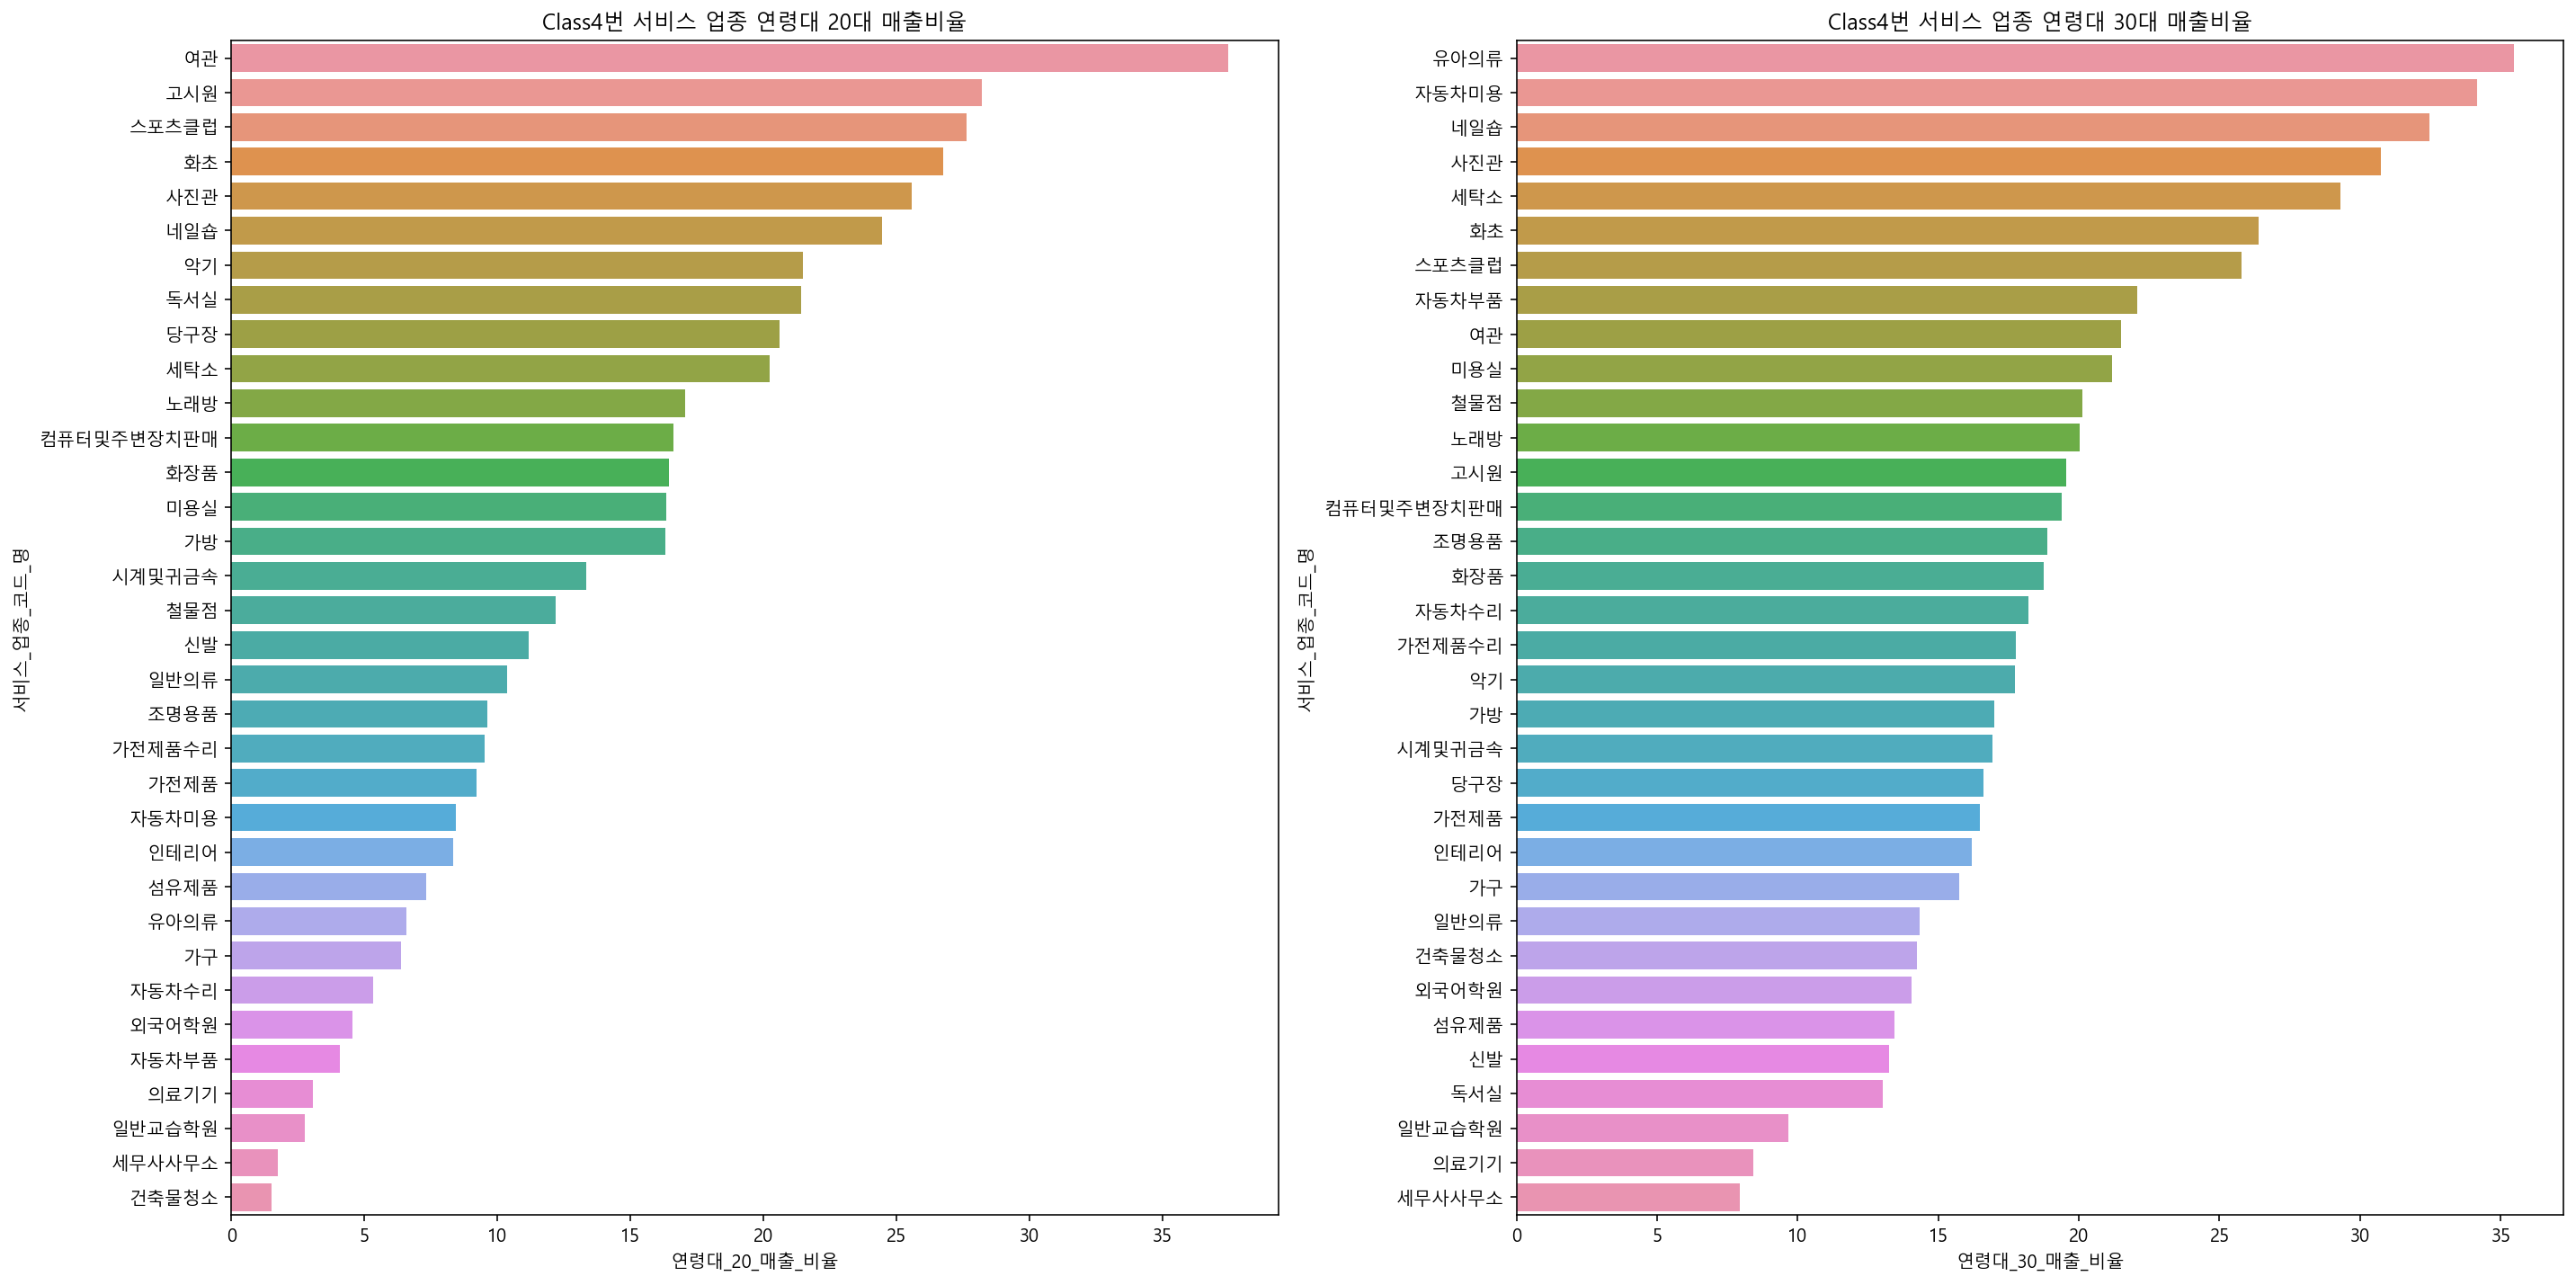

In [23]:
for_plot = class4_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.title('Class4번 서비스 업종 연령대 20대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_20_매출_비율')

for_plot = class4_df[['연령대_30_매출_비율']].sort_values(by='연령대_30_매출_비율', ascending=False)

plt.subplot(122)
plt.title('Class4번 서비스 업종 연령대 30대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_30_매출_비율')

plt.tight_layout()
plt.show()

$$0 $$

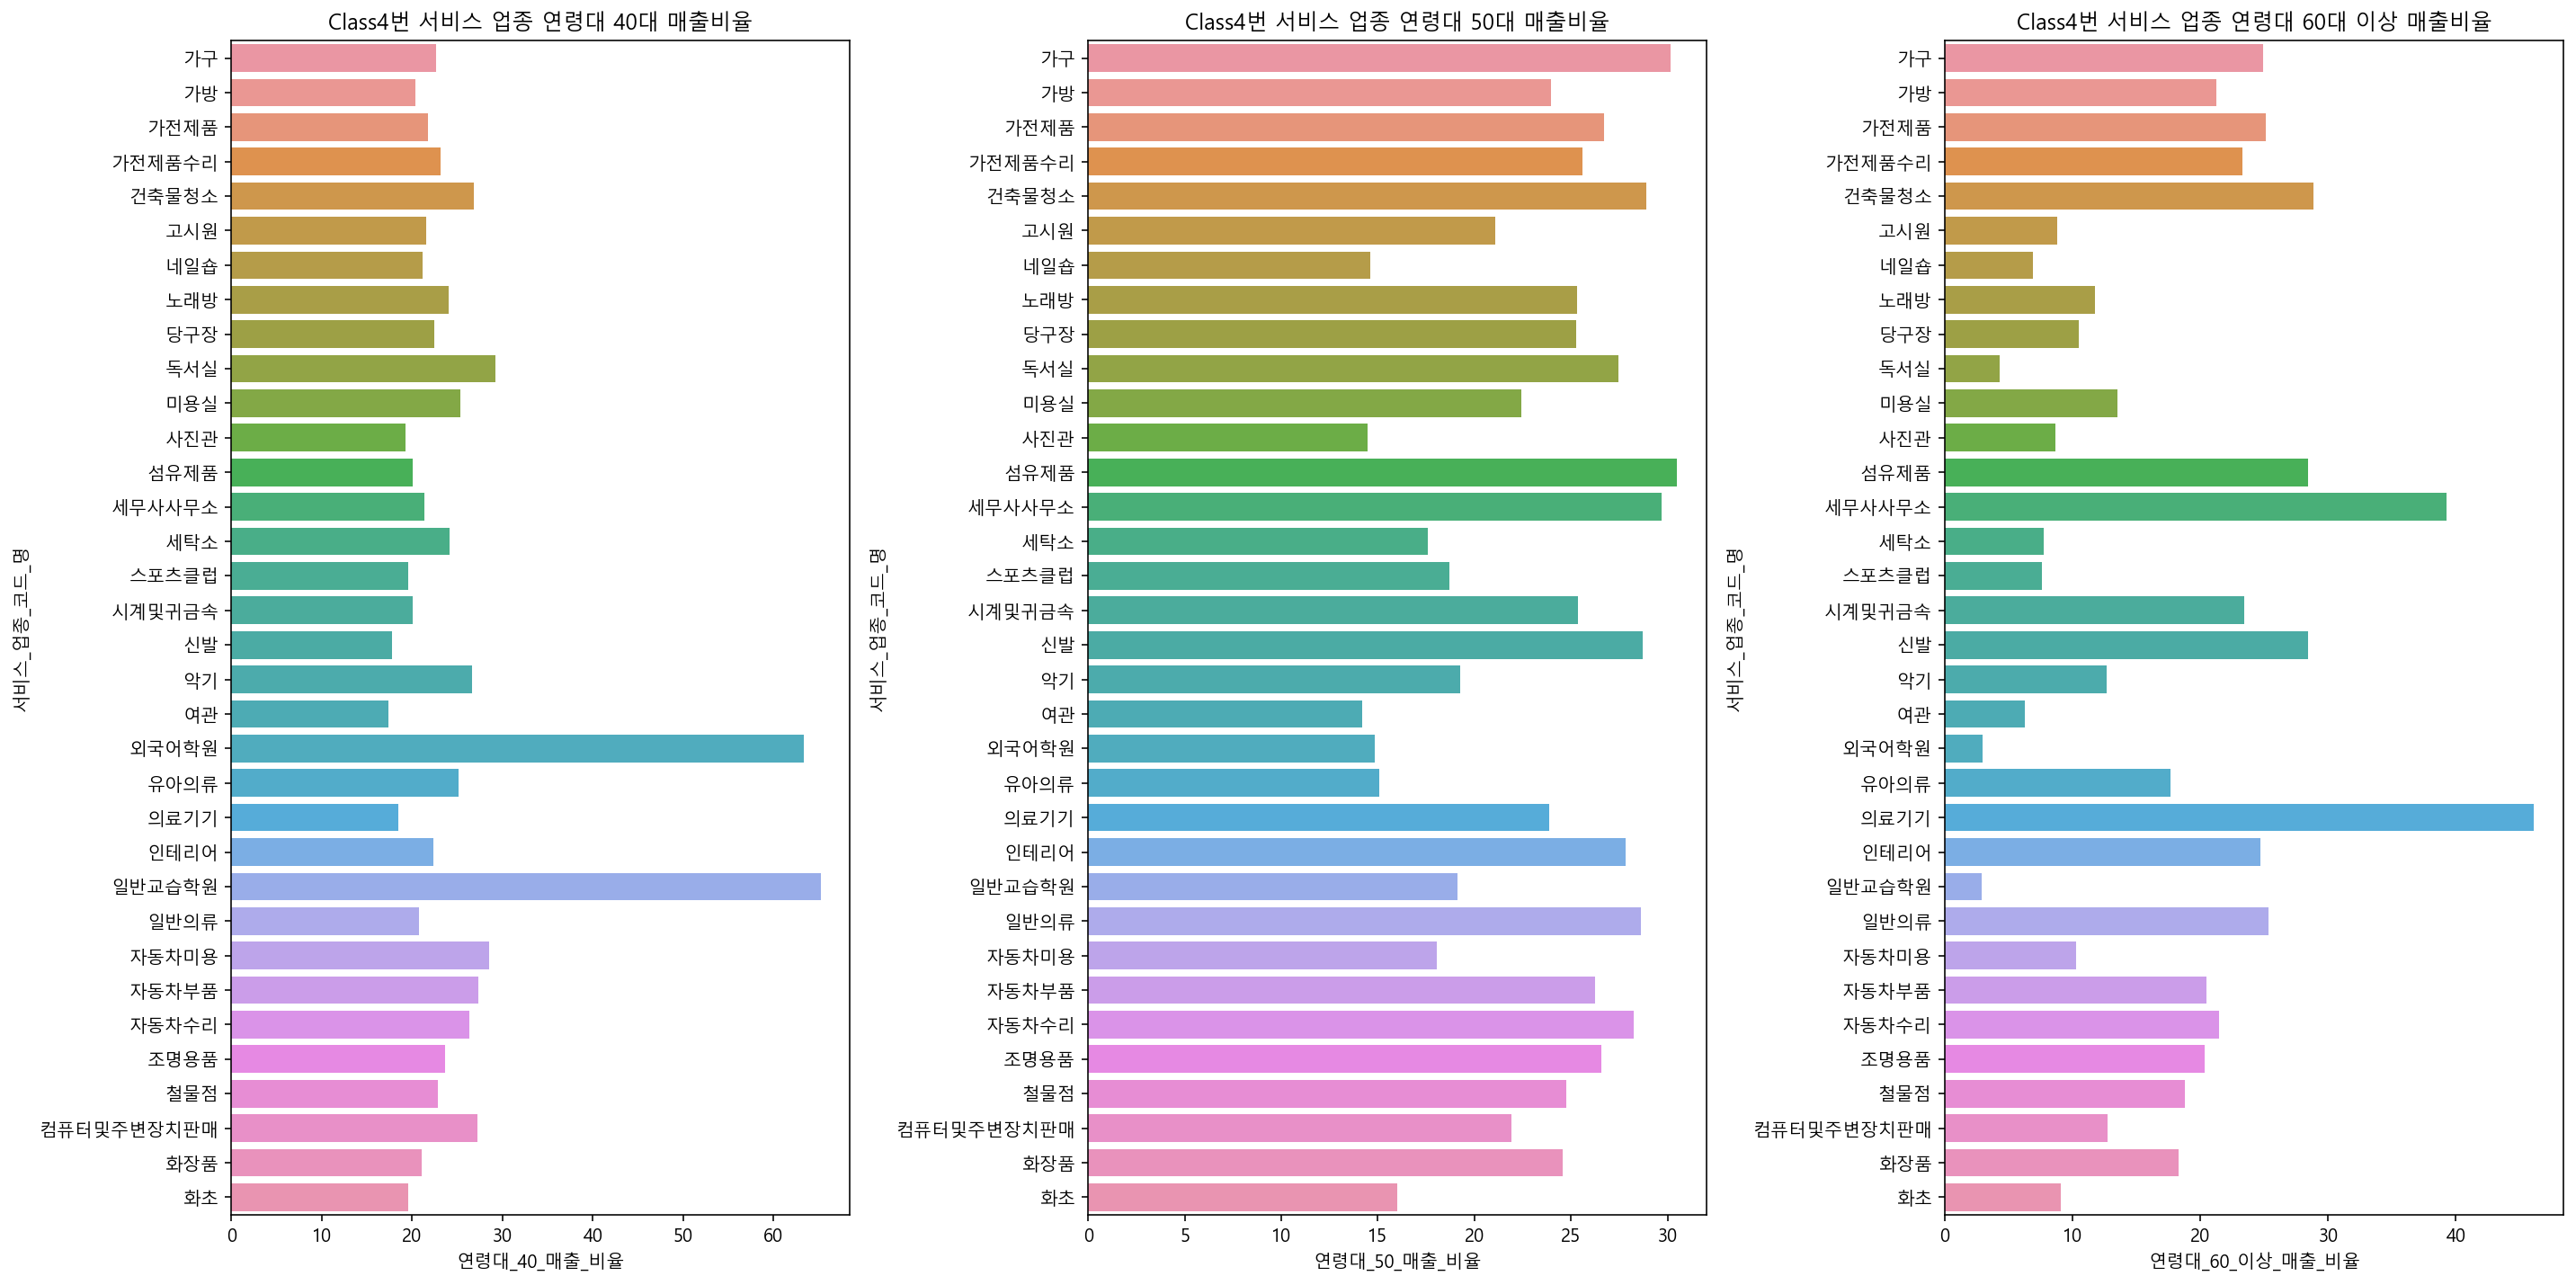

In [24]:
plt.figure(figsize=(20, 10))
plt.subplot(131)
plt.title('Class4번 서비스 업종 연령대 40대 매출비율')
sns.barplot(data=class4_df, y=class4_df.index, x='연령대_40_매출_비율')

plt.subplot(132)
plt.title('Class4번 서비스 업종 연령대 50대 매출비율')
sns.barplot(data=class4_df, y=class4_df.index, x='연령대_50_매출_비율')

plt.subplot(133)
plt.title('Class4번 서비스 업종 연령대 60대 이상 매출비율')
sns.barplot(data=class4_df, y=class4_df.index, x='연령대_60_이상_매출_비율')

plt.tight_layout()
plt.show()

# Class 5

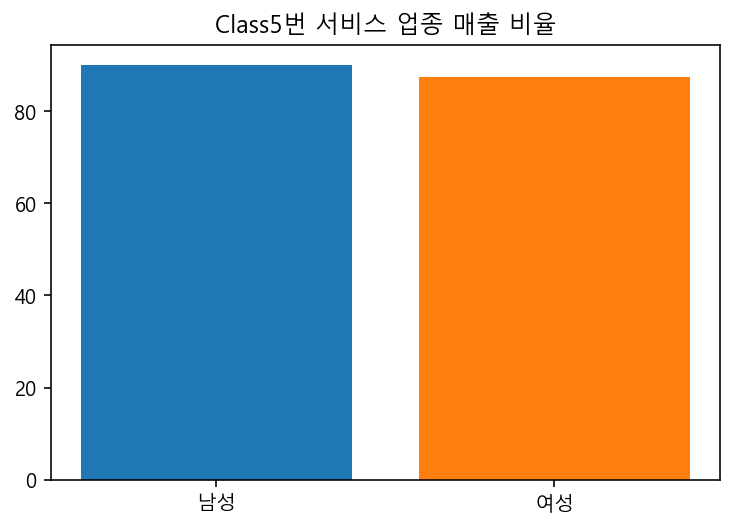

In [25]:
plt.title('Class5번 서비스 업종 매출 비율')
plt.bar(x='남성', height=class4_df['남성_매출_비율'])
plt.bar(x='여성', height=class4_df['여성_매출_비율'])
plt.show()

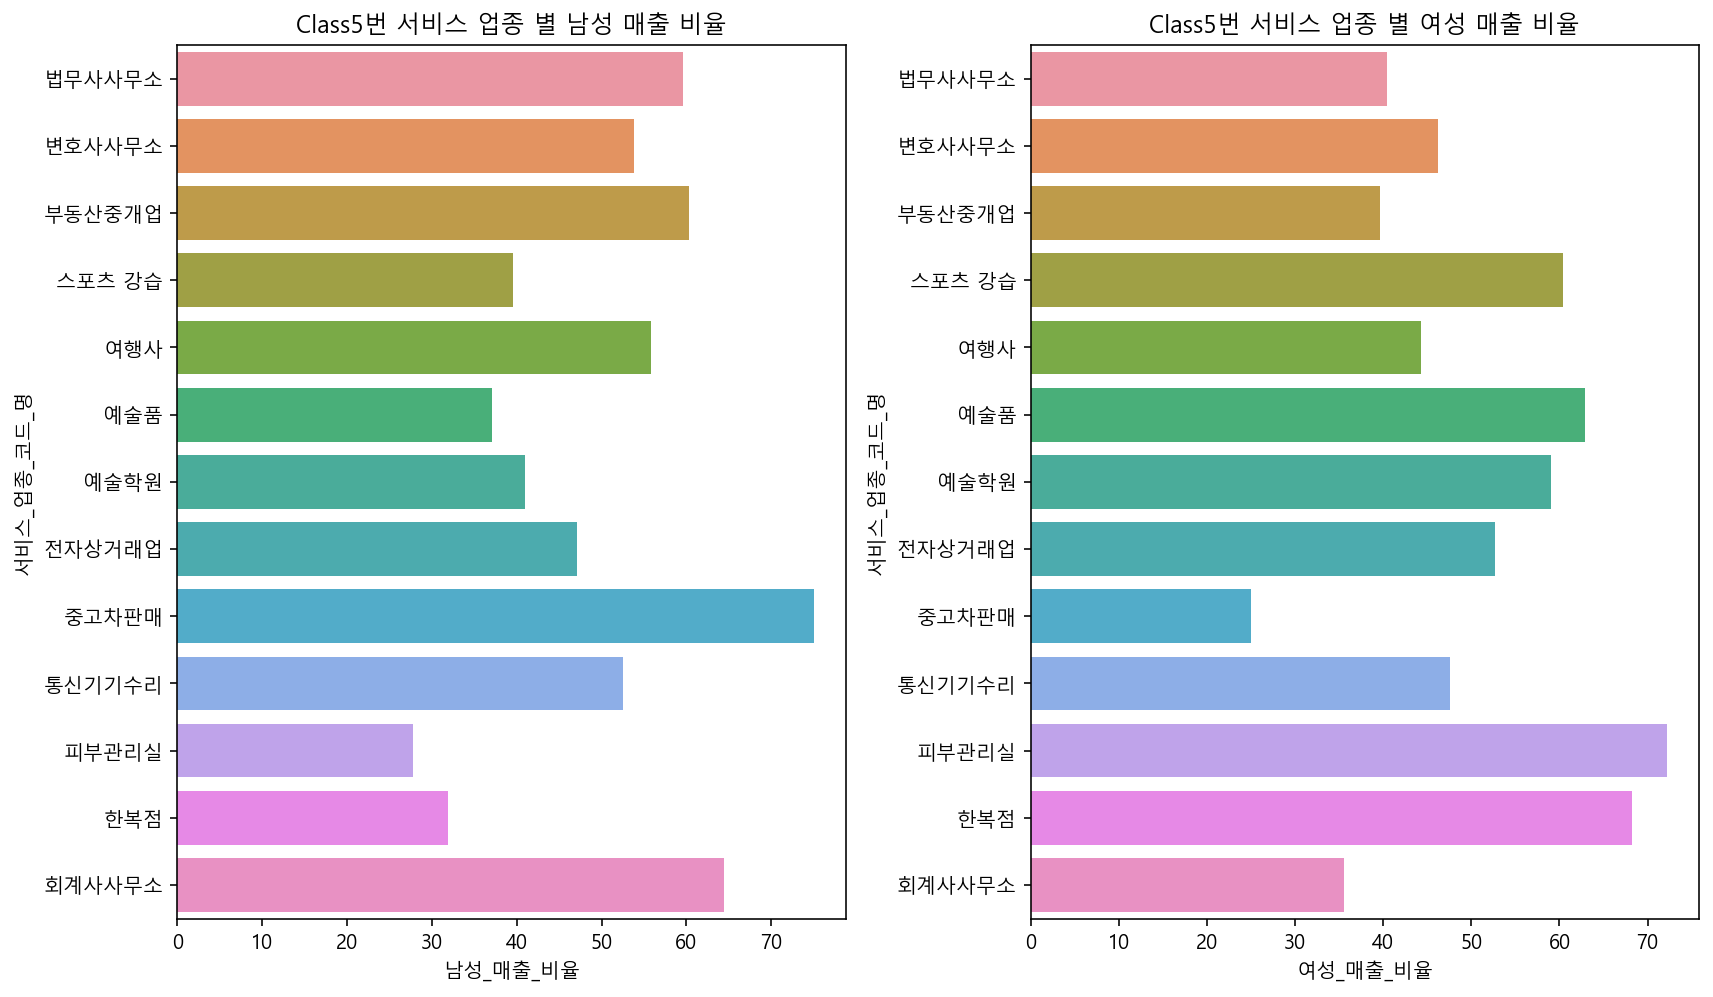

In [26]:
plt.figure(figsize=(12, 7))

plt.subplot(121)
plt.title('Class5번 서비스 업종 별 남성 매출 비율')
sns.barplot(data=class5_df, y=class5_df.index, x='남성_매출_비율')

plt.subplot(122)
plt.title('Class5번 서비스 업종 별 여성 매출 비율')
sns.barplot(data=class5_df, y=class5_df.index, x='여성_매출_비율')
plt.tight_layout()
plt.show()

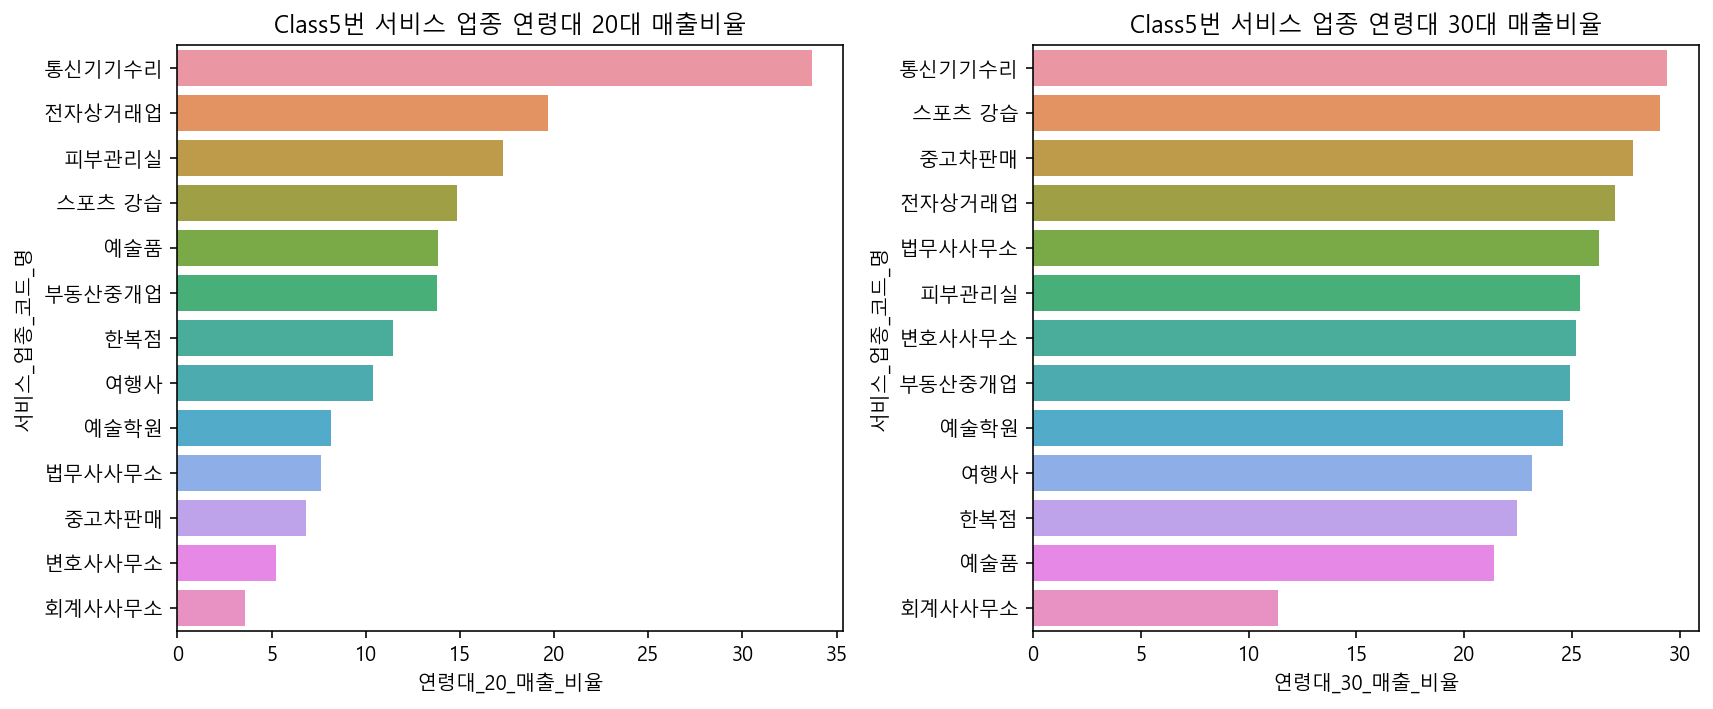

In [27]:
for_plot = class5_df[['연령대_20_매출_비율']].sort_values(by='연령대_20_매출_비율', ascending=False)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.title('Class5번 서비스 업종 연령대 20대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_20_매출_비율')

for_plot = class5_df[['연령대_30_매출_비율']].sort_values(by='연령대_30_매출_비율', ascending=False)

plt.subplot(122)
plt.title('Class5번 서비스 업종 연령대 30대 매출비율')
sns.barplot(data=for_plot, y=for_plot.index, x='연령대_30_매출_비율')

plt.tight_layout()
plt.show()

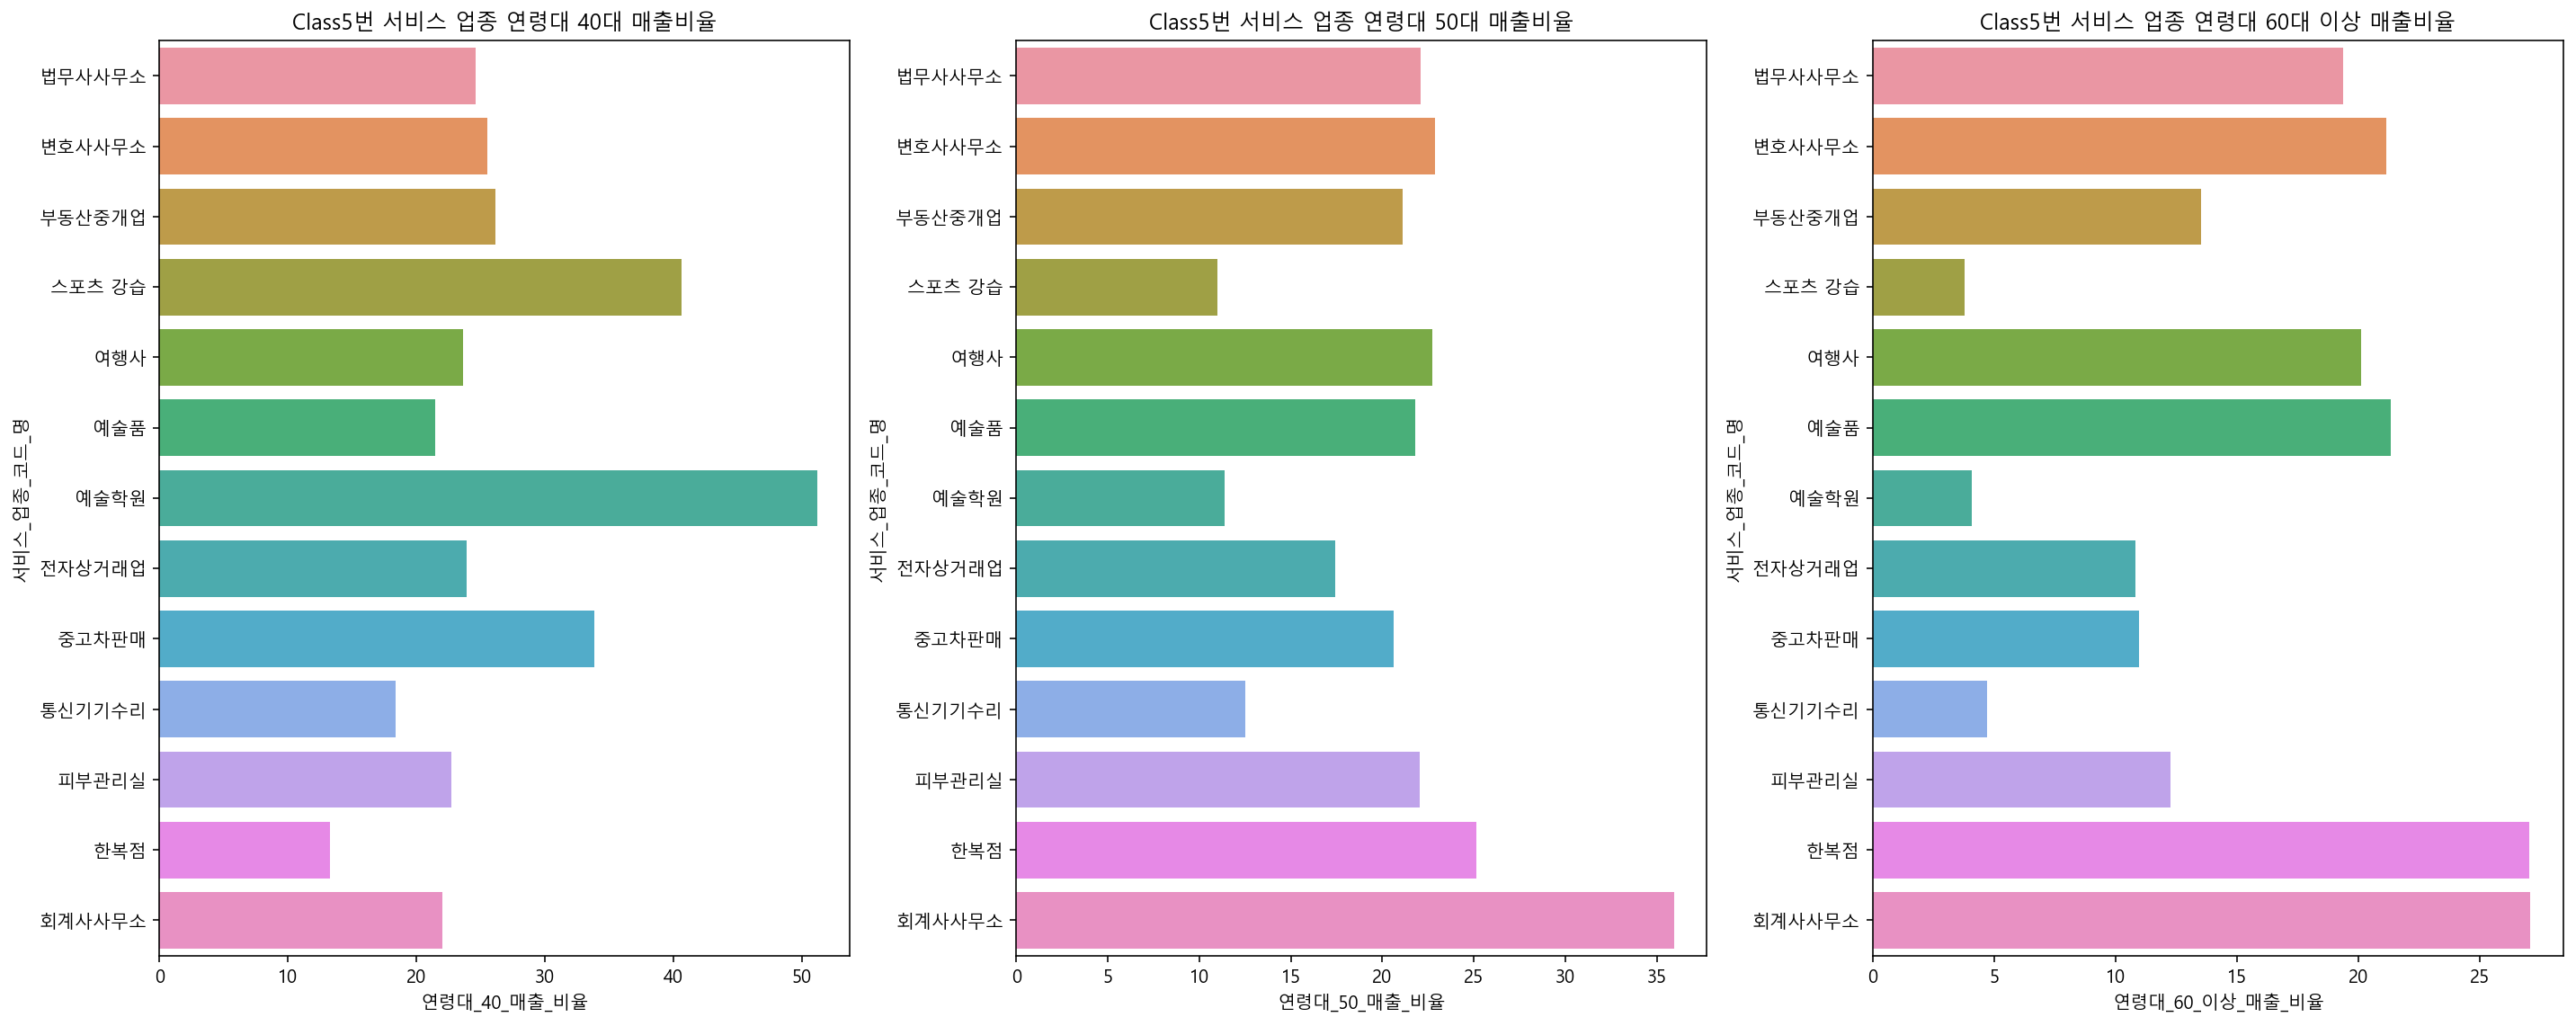

In [28]:
plt.figure(figsize=(20, 8))
plt.subplot(131)
plt.title('Class5번 서비스 업종 연령대 40대 매출비율')
sns.barplot(data=class5_df, y=class5_df.index, x='연령대_40_매출_비율')

plt.subplot(132)
plt.title('Class5번 서비스 업종 연령대 50대 매출비율')
sns.barplot(data=class5_df, y=class5_df.index, x='연령대_50_매출_비율')

plt.subplot(133)
plt.title('Class5번 서비스 업종 연령대 60대 이상 매출비율')
sns.barplot(data=class5_df, y=class5_df.index, x='연령대_60_이상_매출_비율')

plt.tight_layout()
plt.show()

유아(의류, 육아용품, 장난감 ...)

뉴스기사 크롤링, 맘스열린장터, 해시태그, 


1. 오프라인 서울시 상권 데이터와 RFM 기법을 이용한 성장 및 쇠퇴산업 분석


2. 오프라인의 쇠퇴 산업 중 온라인 시장에서 성공한 사례가 있으므로 온라인 시장에서 MZ세대를 겨냥한 경영전략 수립이 가능할 것으로 분석


3. 유아와 관련된 텍스트데이터, 맘스열린장터 후기, 해시태그, 트렌드지수 등의 데이터를 수집하여 관련 키워드 및 토픽 분석(니즈분석, 수요분석)


4. MZ세대를 겨냥한 초개인화 맞춤형 추천시스템으로 로컬마켓(온라인)과 오프라인 유아용품 시장을 연결하여 오프라인 시장의 유아용품 시장을 활성화...


뉴스기사 수집, 토픽모델링(뉴스기사, 후기데이터)

신행 워드클라우드